# Exective summary of Work Package 1

## Objectives

This work package aims at developing methods for cleaning and preprocessing the data, and select the most relevant features for further model development.

## Tasks

- Task 1: Read and understand the data
  - Understand how to use the provided utility function to read the data
  - Understand the data structure and the meaning of each column
- Task 2: Clean and preprocess the data
  - Explore the quality of the data
  - Develop methods to remove the outlier and clean the data
- Task 3: Feature engineering
  - Visualize the data
  - Develop methods to select the most relevant features

## Delierables

- A Jupyter notebook reporting the process and results of the above tasks


# Before starting, please:
- Fetch the most up-to-date version of the github repository.
- Create a new branch called "WP2_TD_Lect_5_YourName", based on the branch "zhiguo_dev" and switch to it.
- Copy the notebook WP2_DATA-DRIVEN FAULT DETECTION/support/WP2_TD_Lect_5 to WP2_DATA-DRIVEN FAULT DETECTION/TD_5/, and rename it to TD_Lect_5_YourName.ipynb
- After finishing this task, push your changes to your github repository.
- Submit a pull request to the "zhiguo_dev" branch.

# Task 1 Read and understand the data

## Sub-task 1: Read the data from the different csv files and store it in a dataframe. 

The training data is stored in the following path: `projects\maintenance_industry_4_2024\dataset\training_data`. In this folder, there are some subfolders. Each subfolder contains the data of one test. The name of the subfolder tells you the time when the test is performed. Inside each subfolder, there are six csv files, each file corresponds to the data from one motor. The file `Test condition.xlsx` tells you the test condition for each test.

In `utility.py`, there are supporting functions `read_all_csvs_one_test` and `read_all_test_data_from_path`. Please have a look at the demo in `demo_read_data_and_preprocess.ipynb`, and use these supporting functions to read the data.


**Your task:**

- Create a dataframe to store data from all the test.
- Write a paragraph to explain the structure of the resulted dataframe (what does each column represent?)

Libraries

In [132]:
from utility import read_all_test_data_from_path
from utility import read_all_csvs_one_test
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pca
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

Create a dataframe to store data from all the test.

20240105_164214: 0    Robot not moving, just starting up.
Name: Description, dtype: object

20240105_165300: 1    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object

20240105_165972: 2    Not moving. After the operation.
Name: Description, dtype: object

20240320_152031: 3    Robot not moving, just starting up.
Name: Description, dtype: object

20240320_153841: 4    Not moving. Move motor 6 -> motor 1 sequentially.
Name: Description, dtype: object

20240320_155664: 5    Robot not moving.
Name: Description, dtype: object

20240321_122650: 6    Try to move to pick up an item from second flo...
Name: Description, dtype: object

20240325_135213: 7    Robot not moving, just starting up.
Name: Description, dtype: object

20240325_152902: 8    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object

20240325_155003: 9    Starting position: Straigt. Perform two operat...
Name: Description, dtype: object



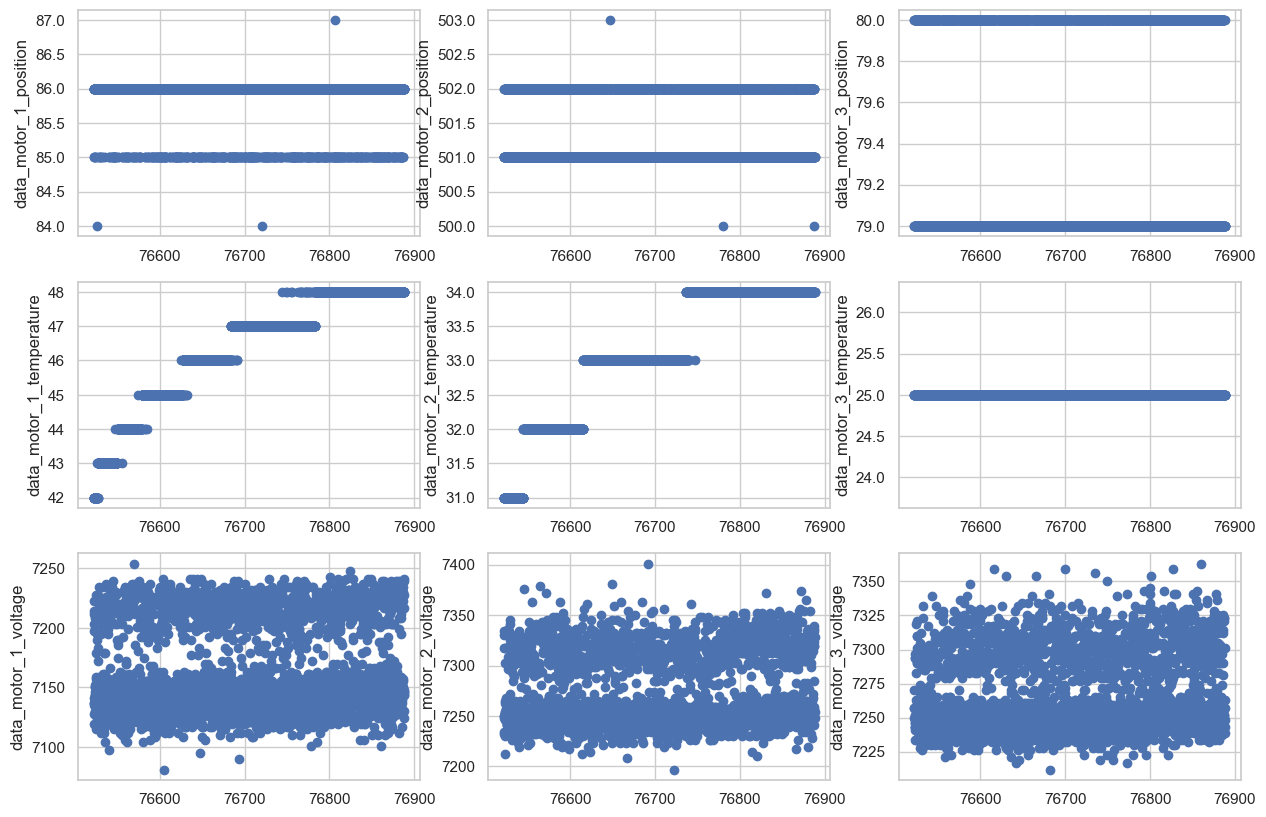

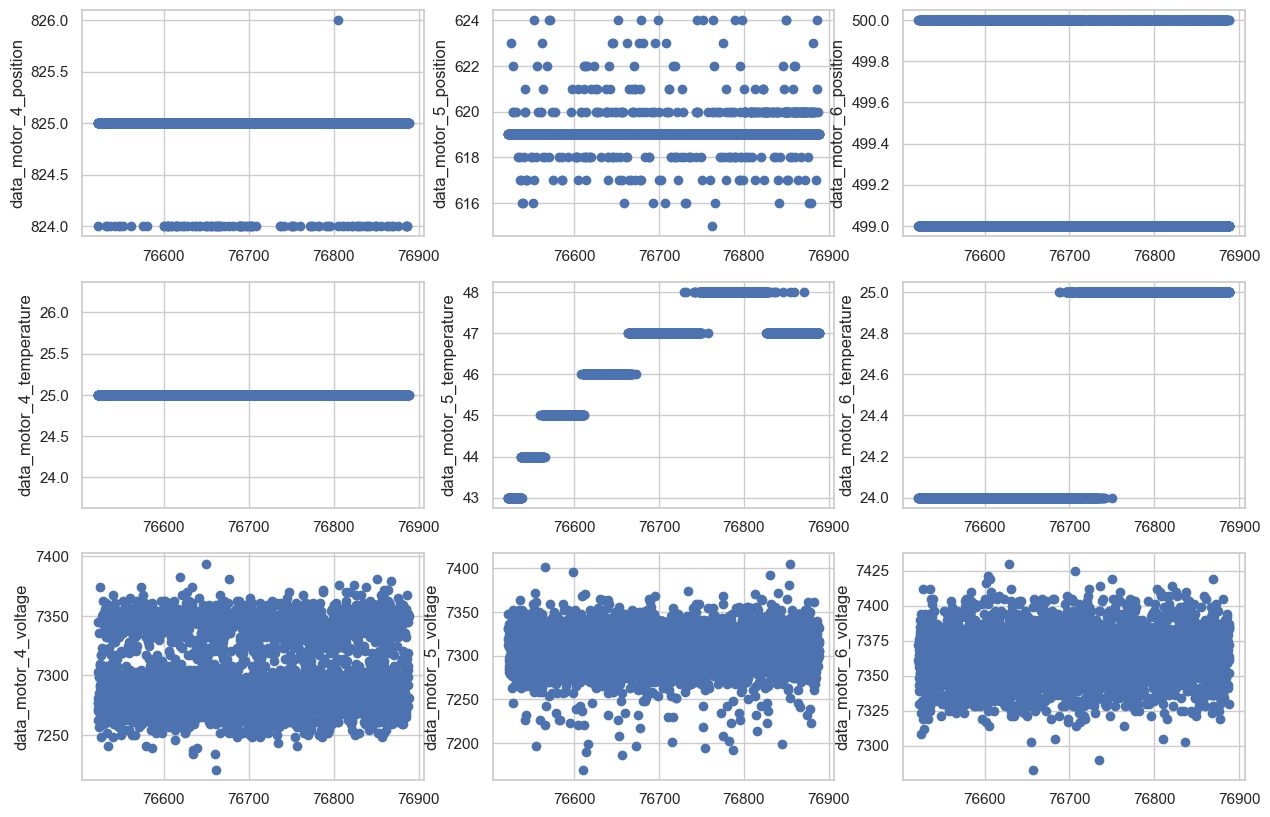

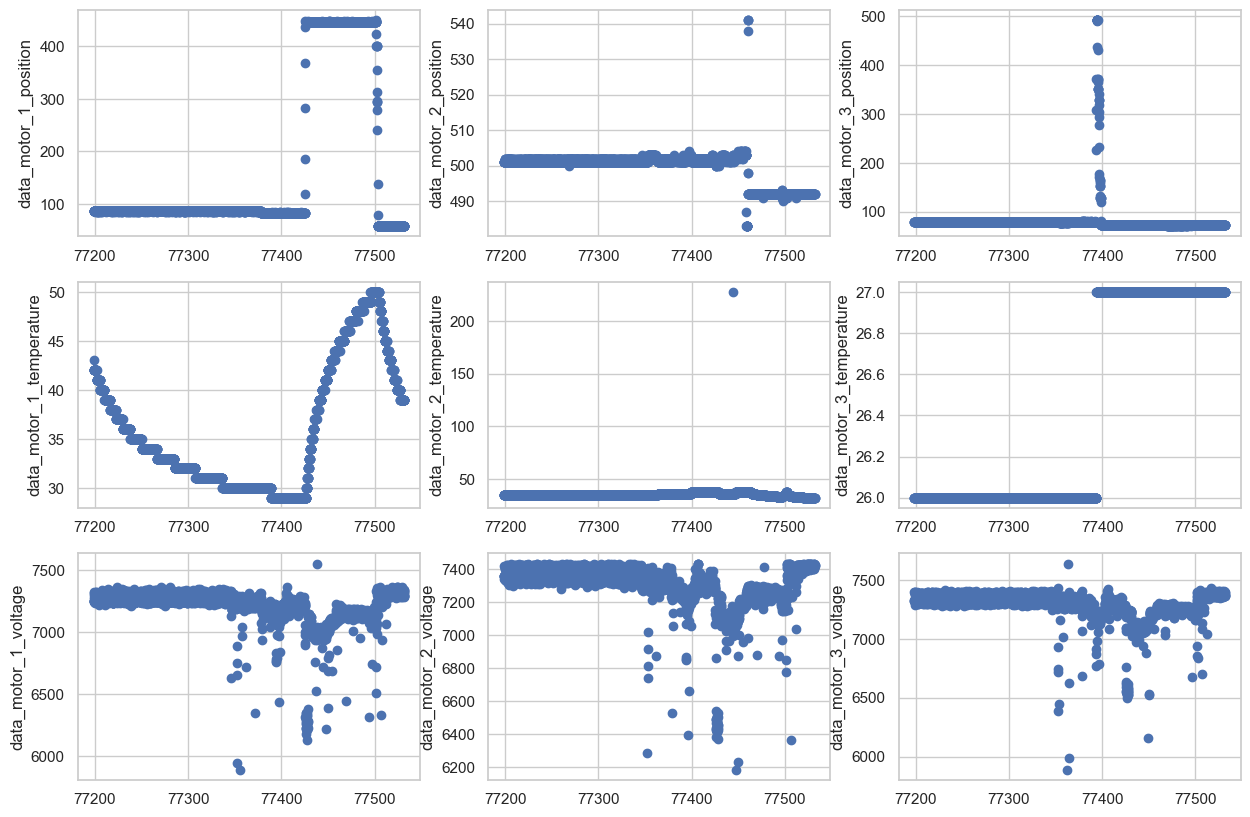

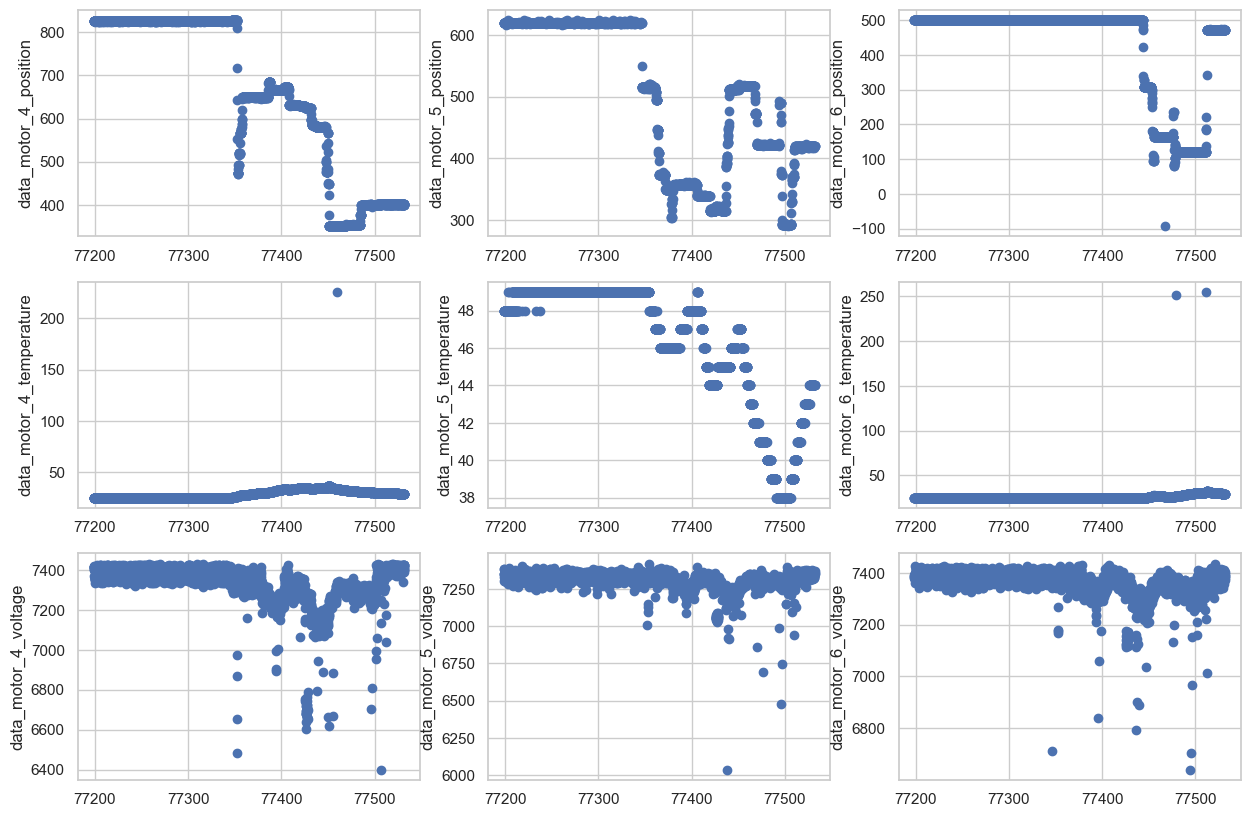

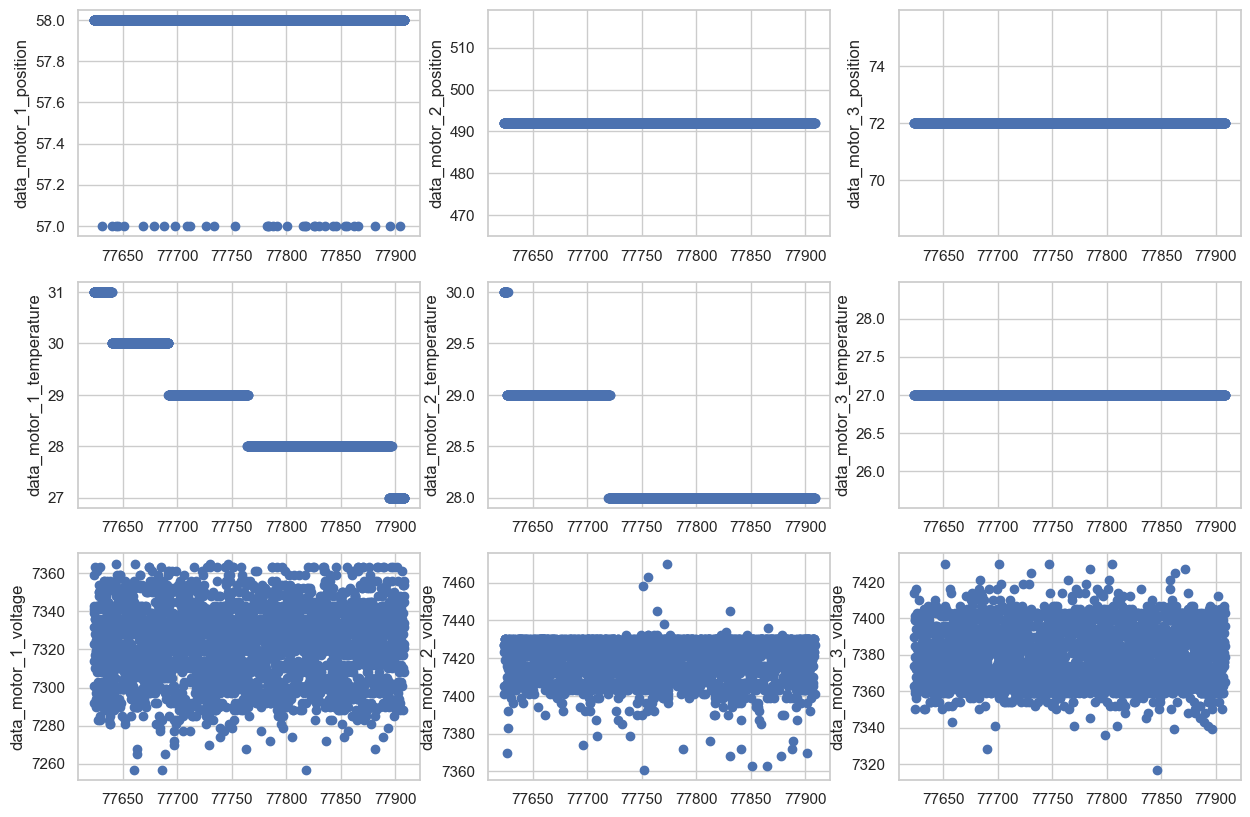

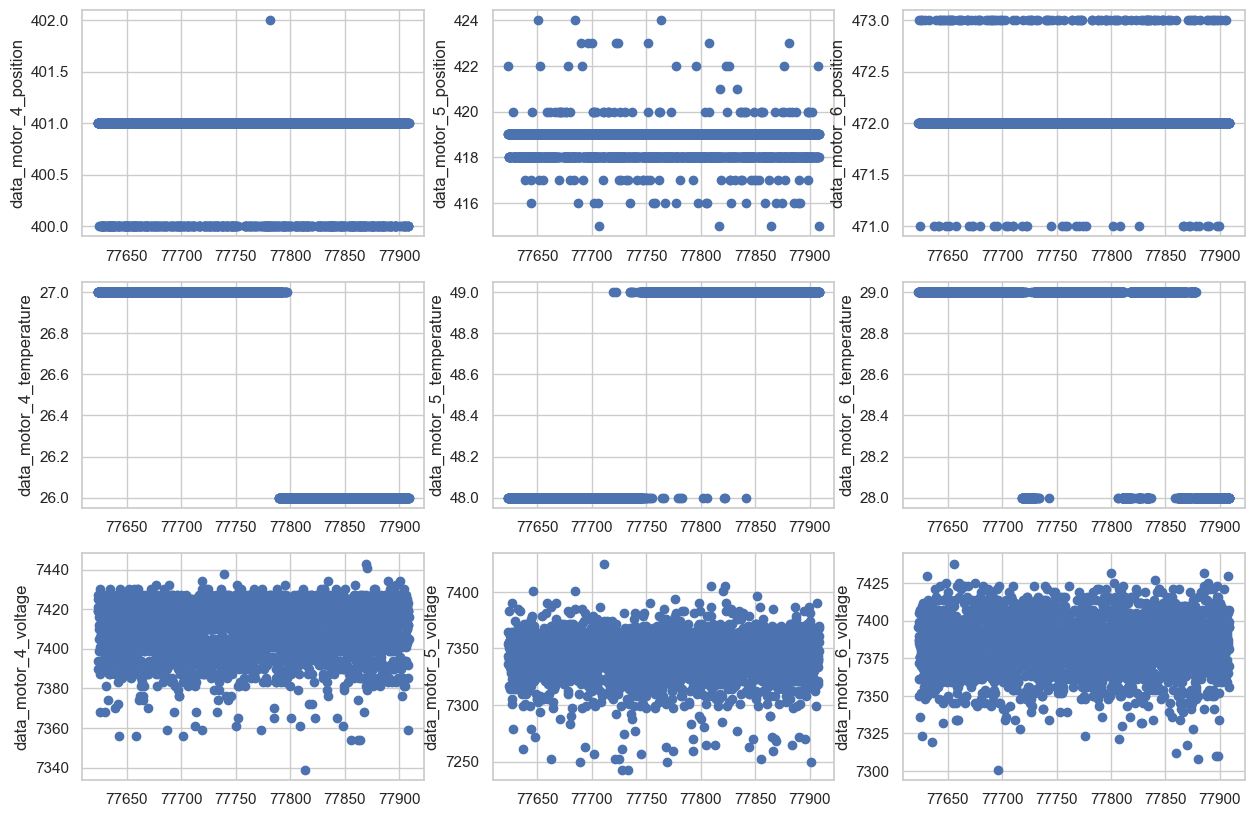

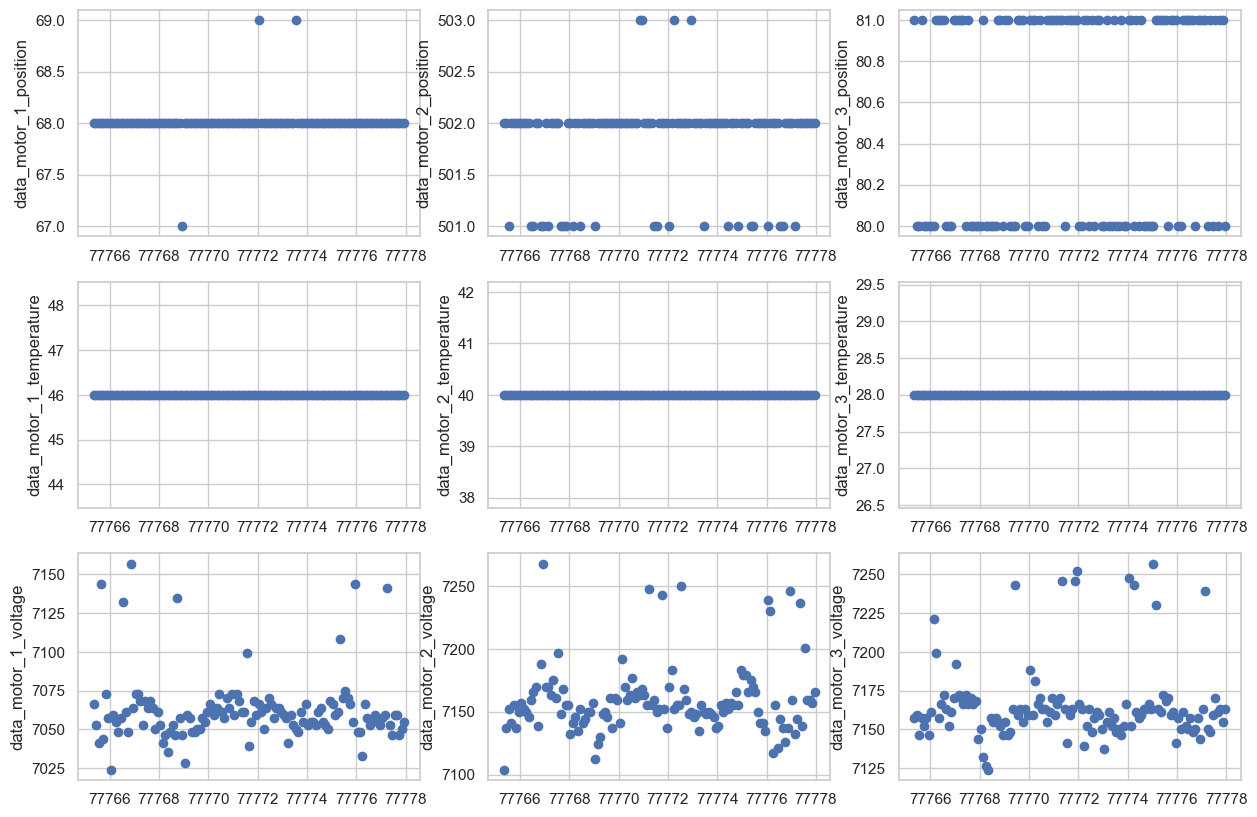

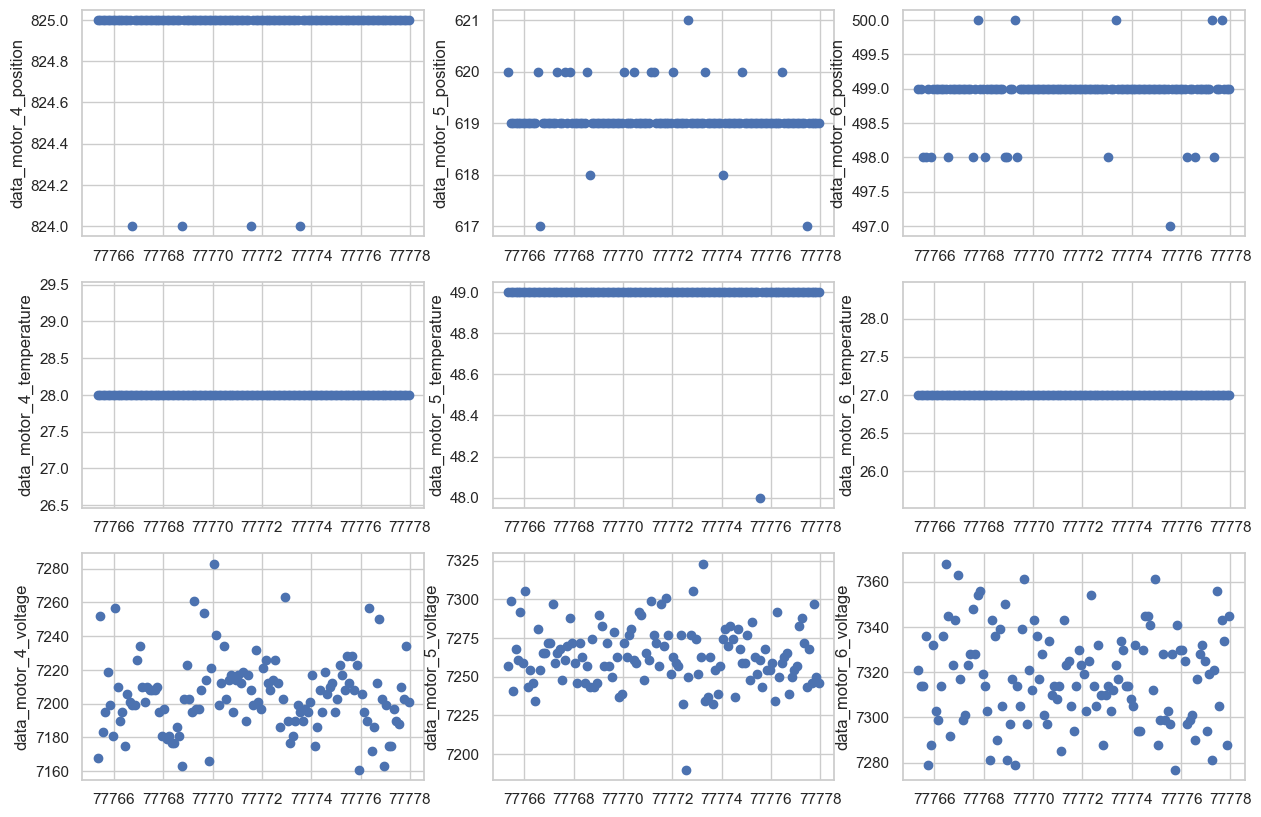

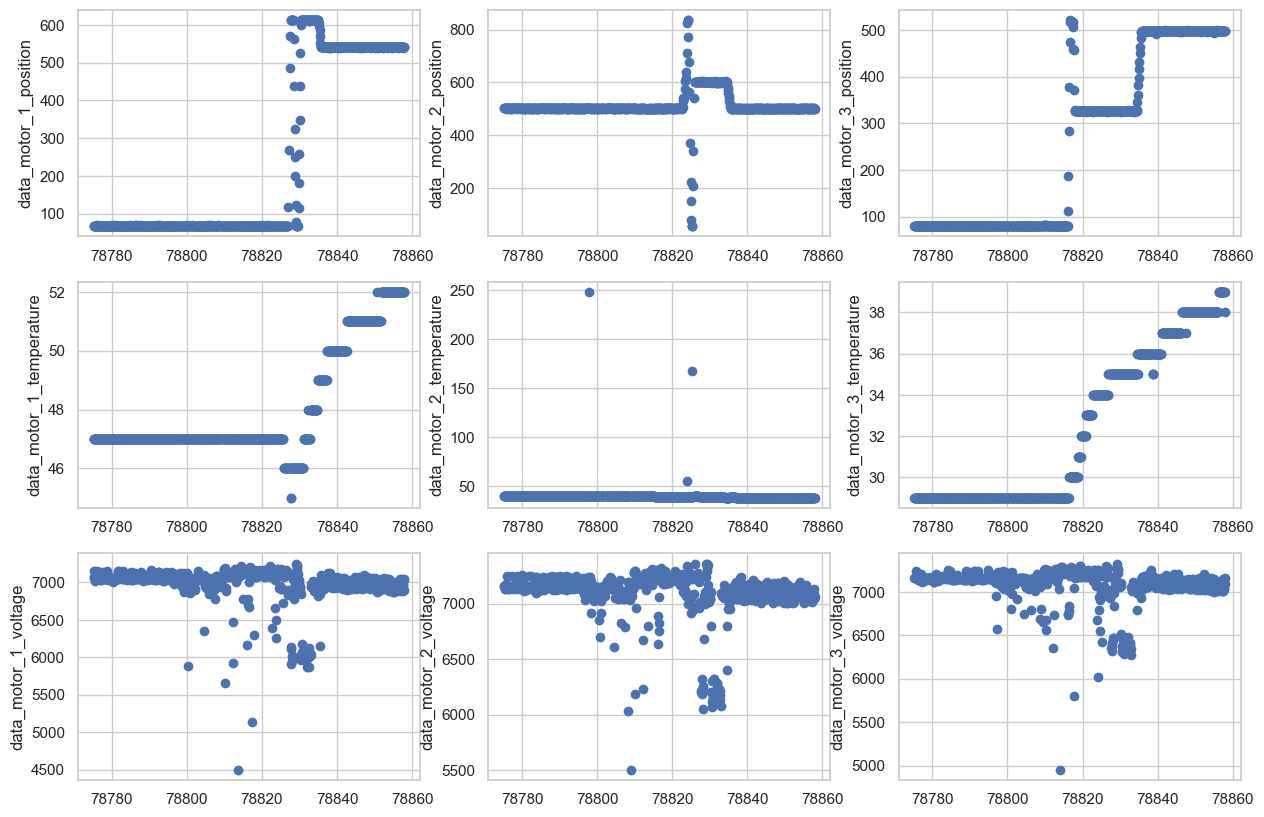

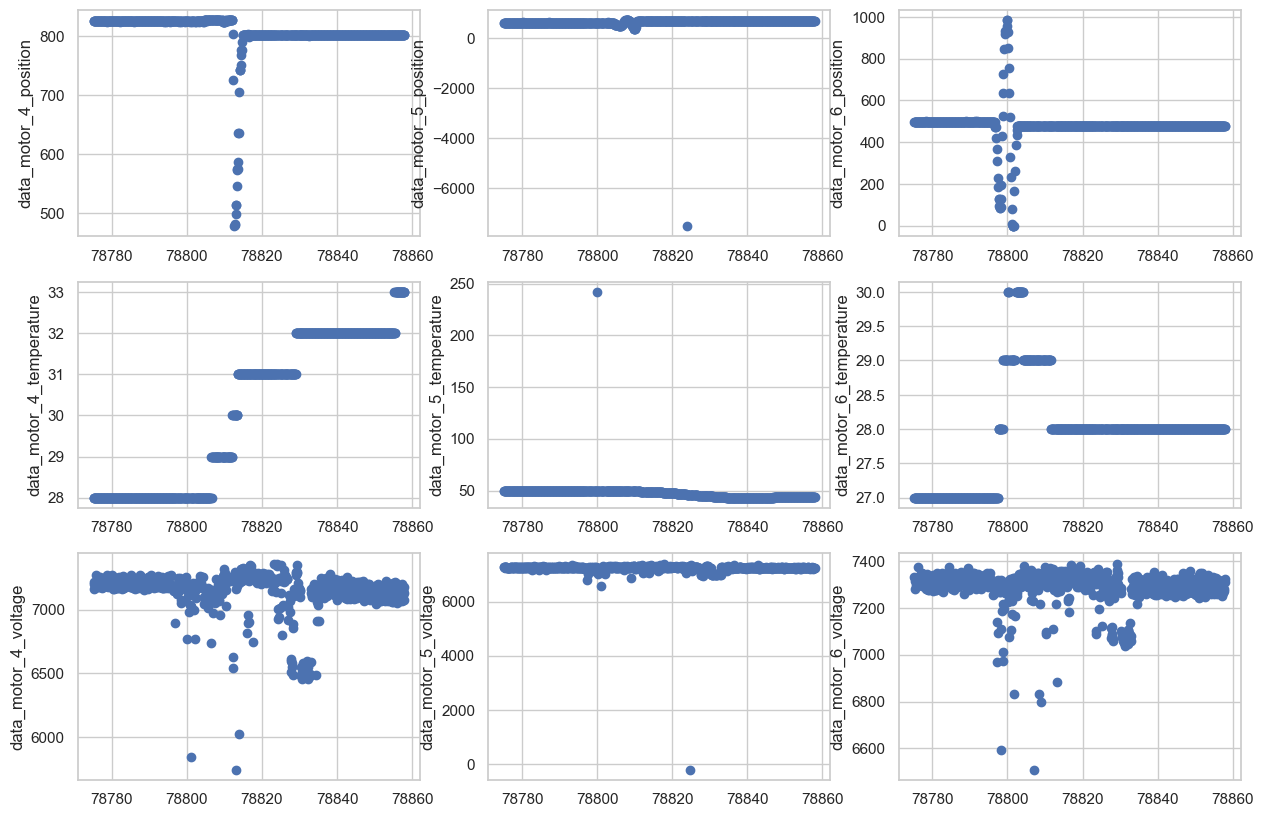

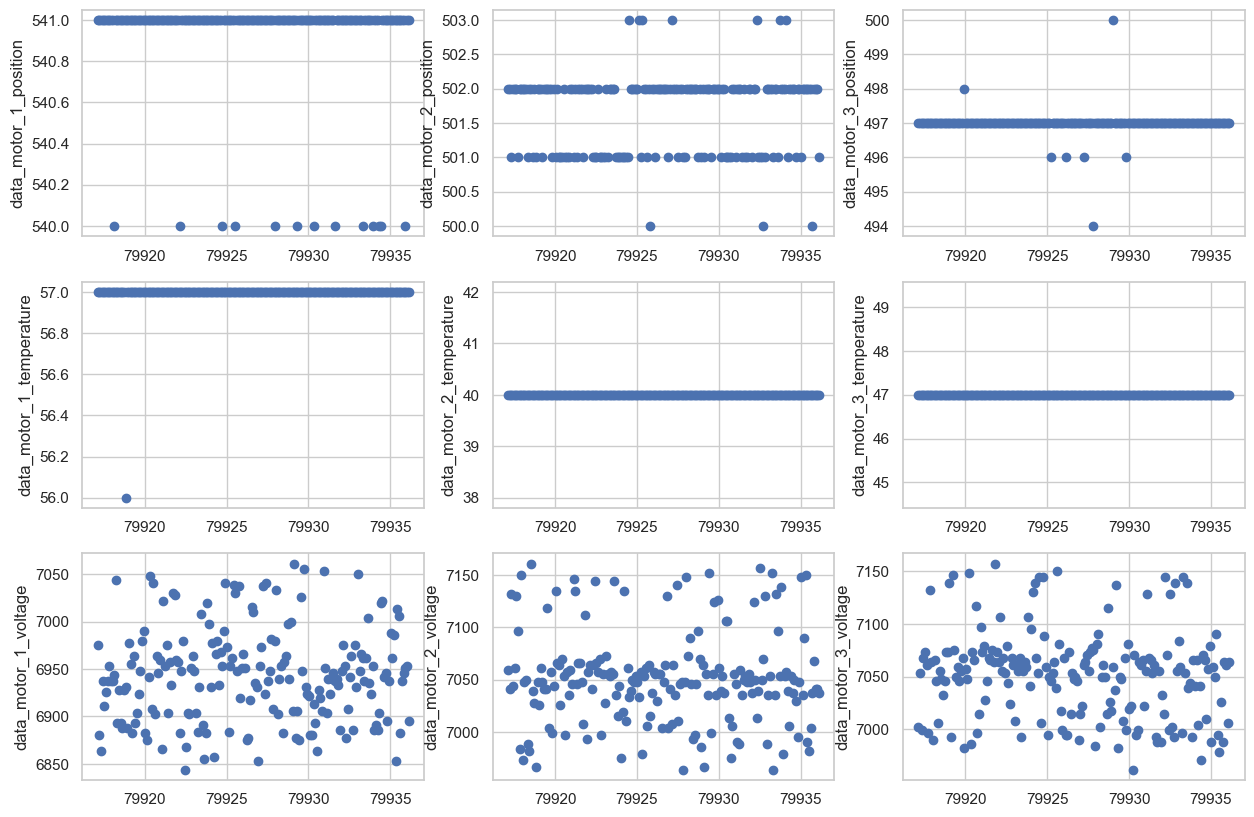

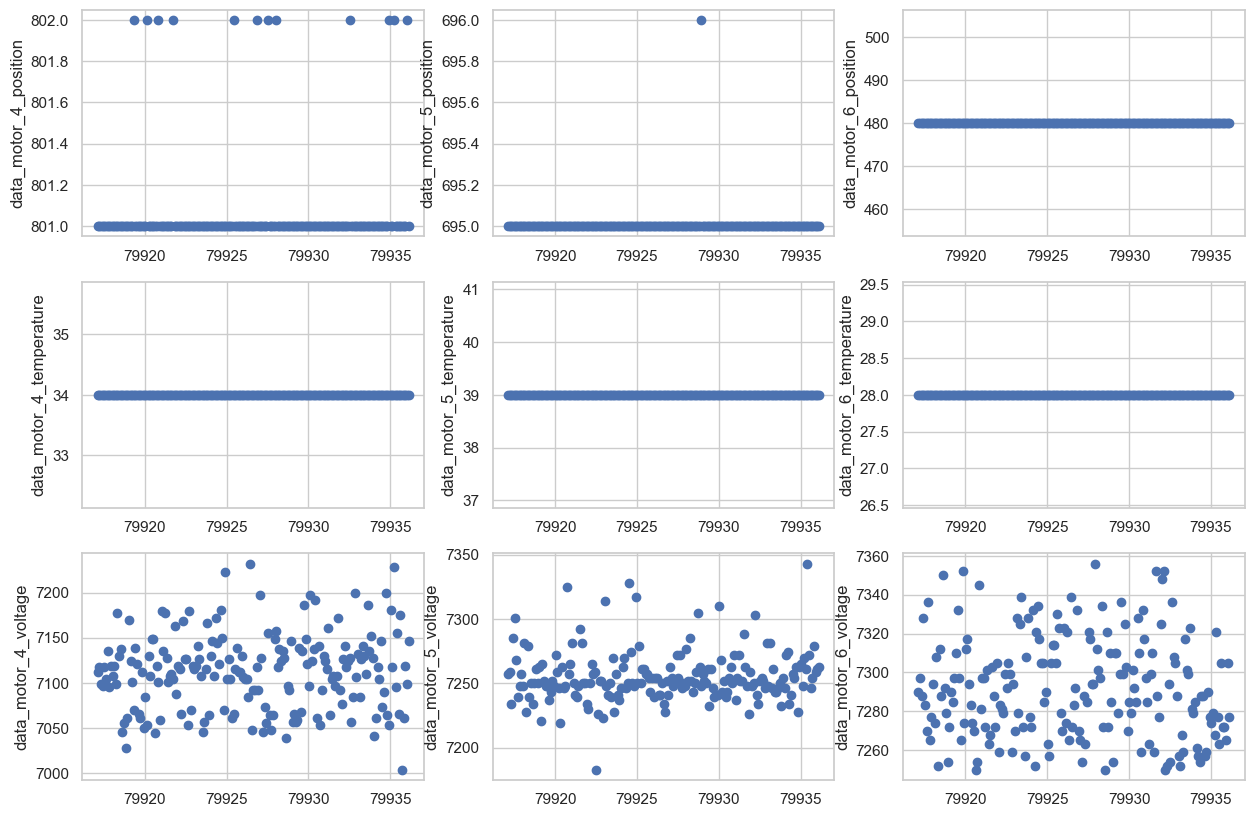

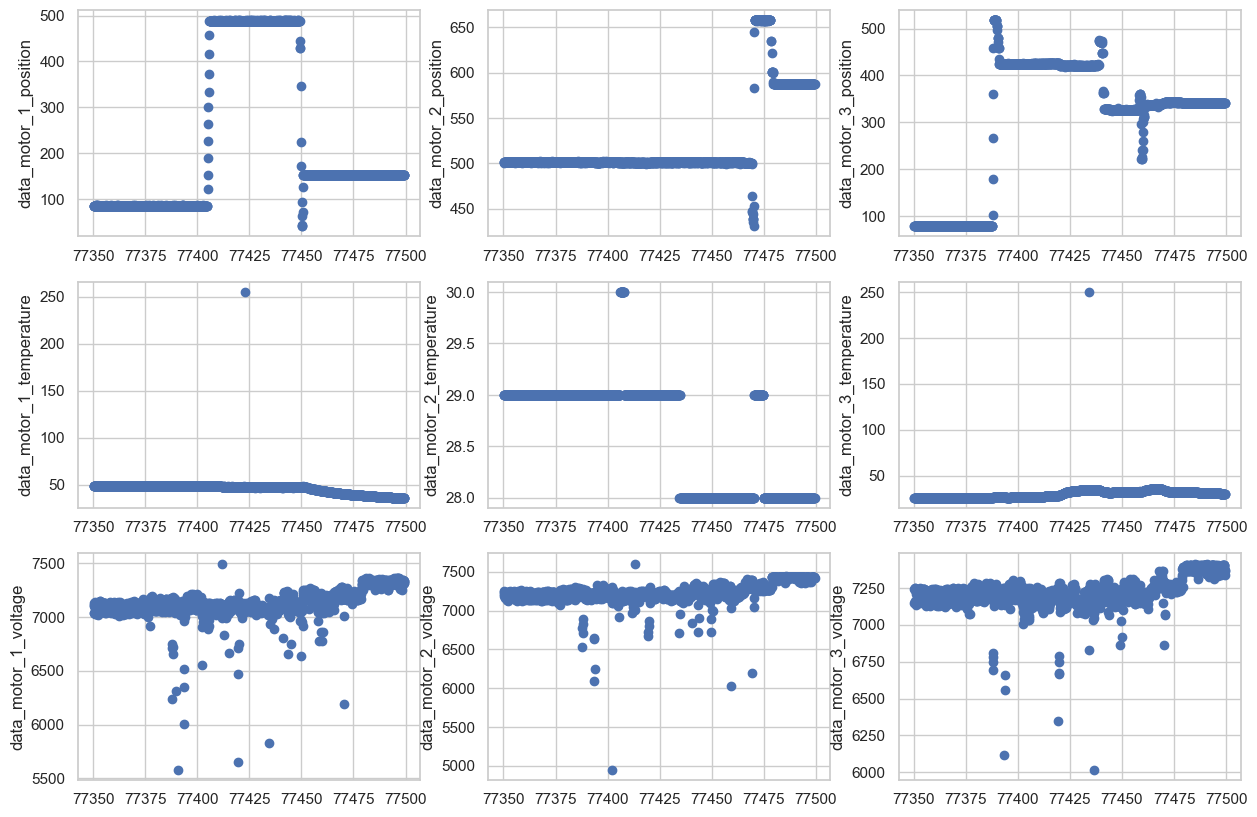

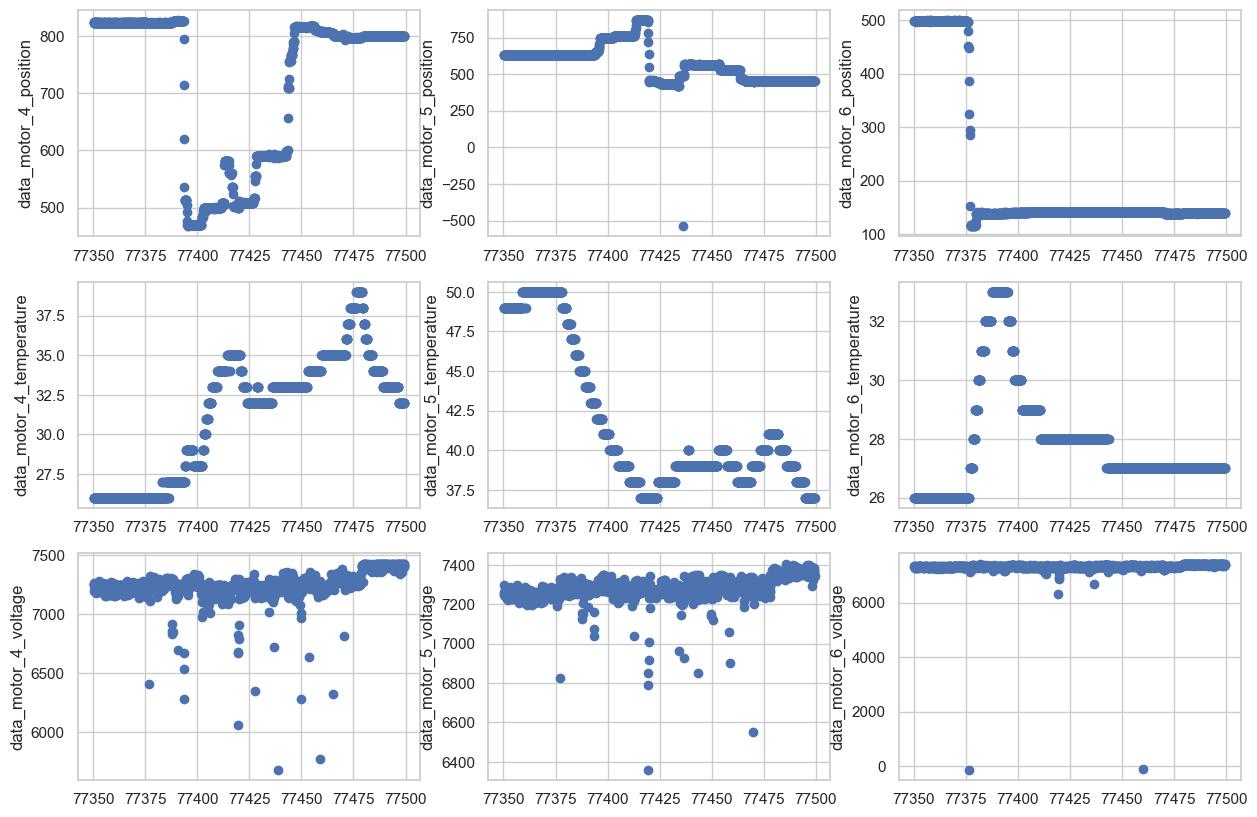

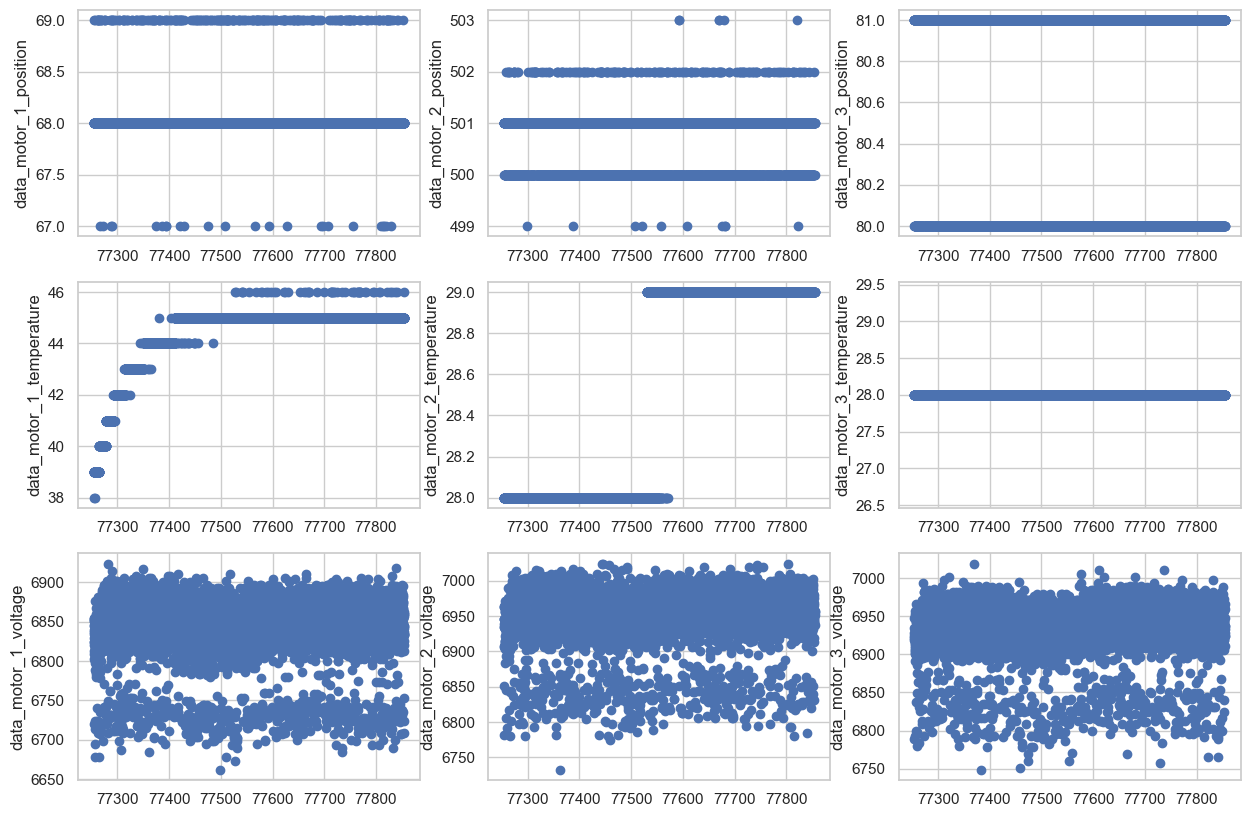

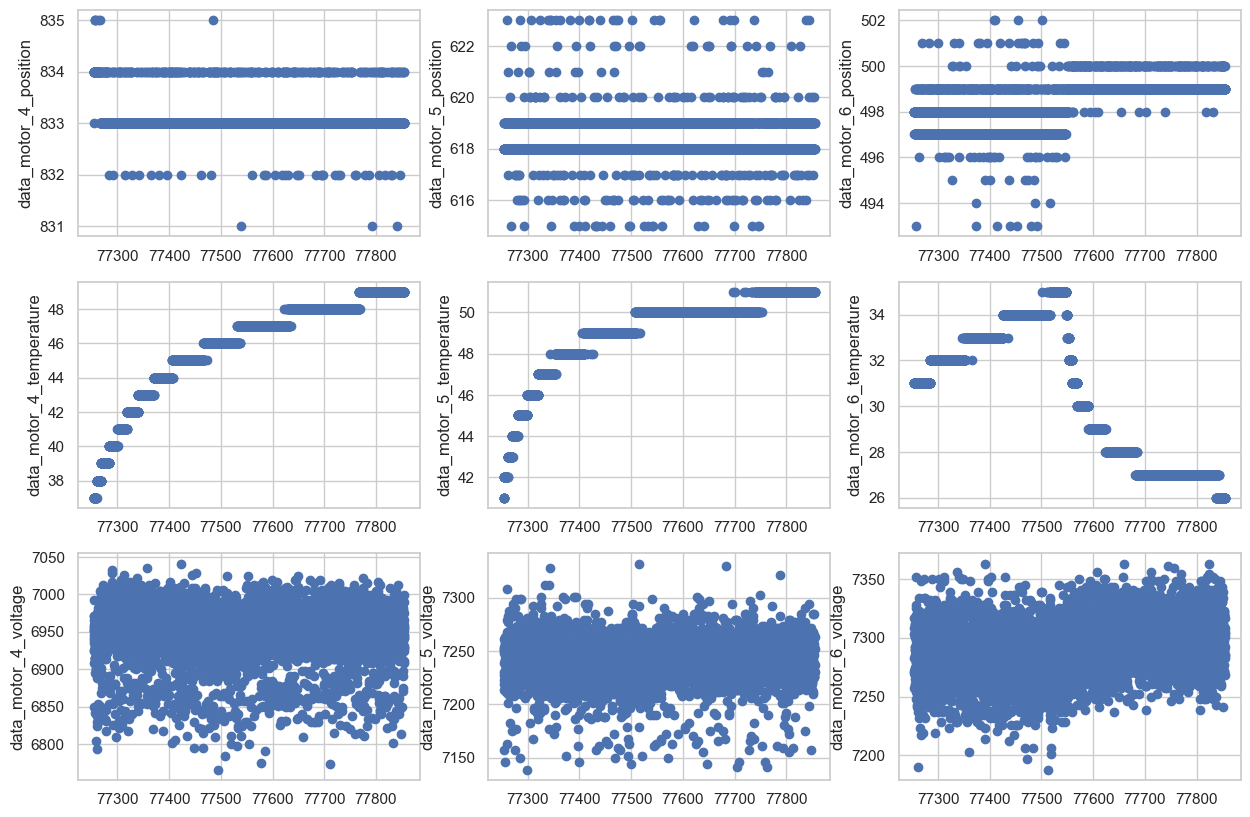

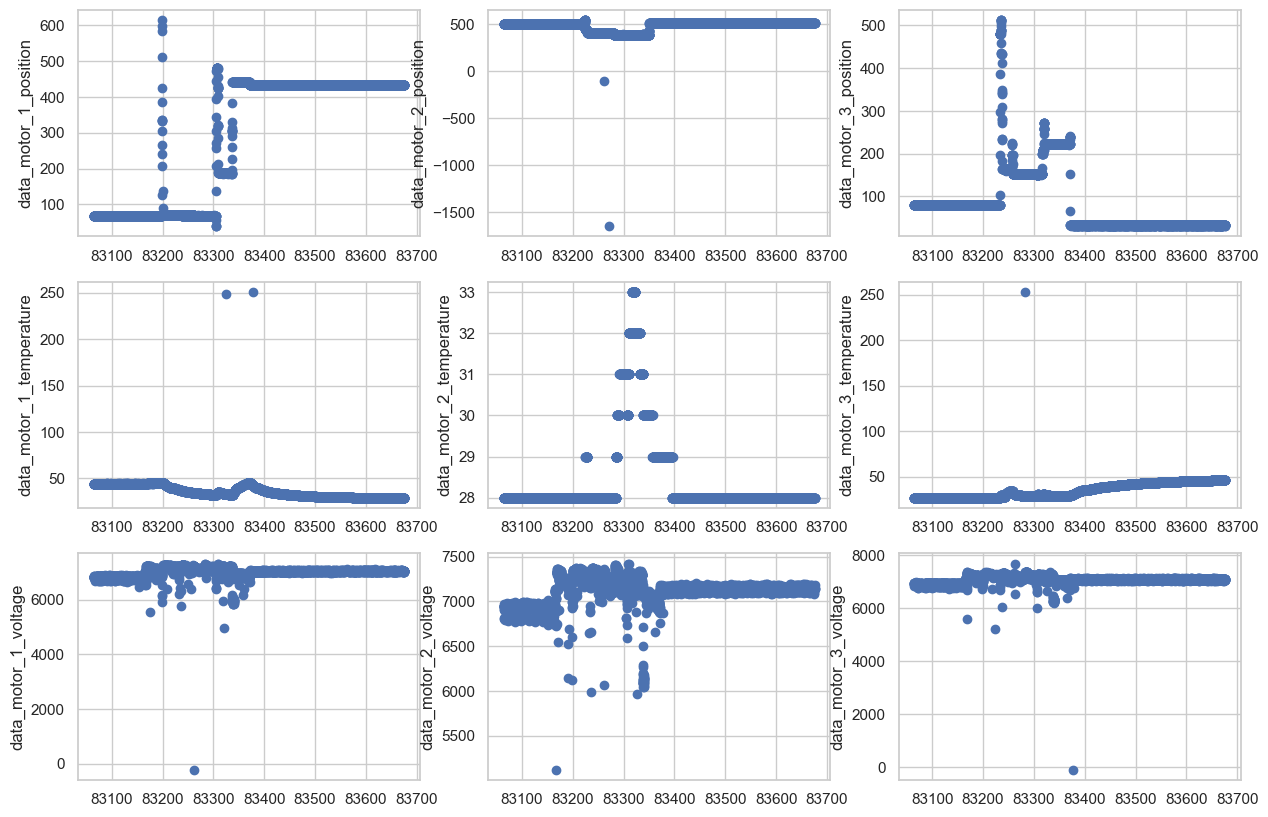

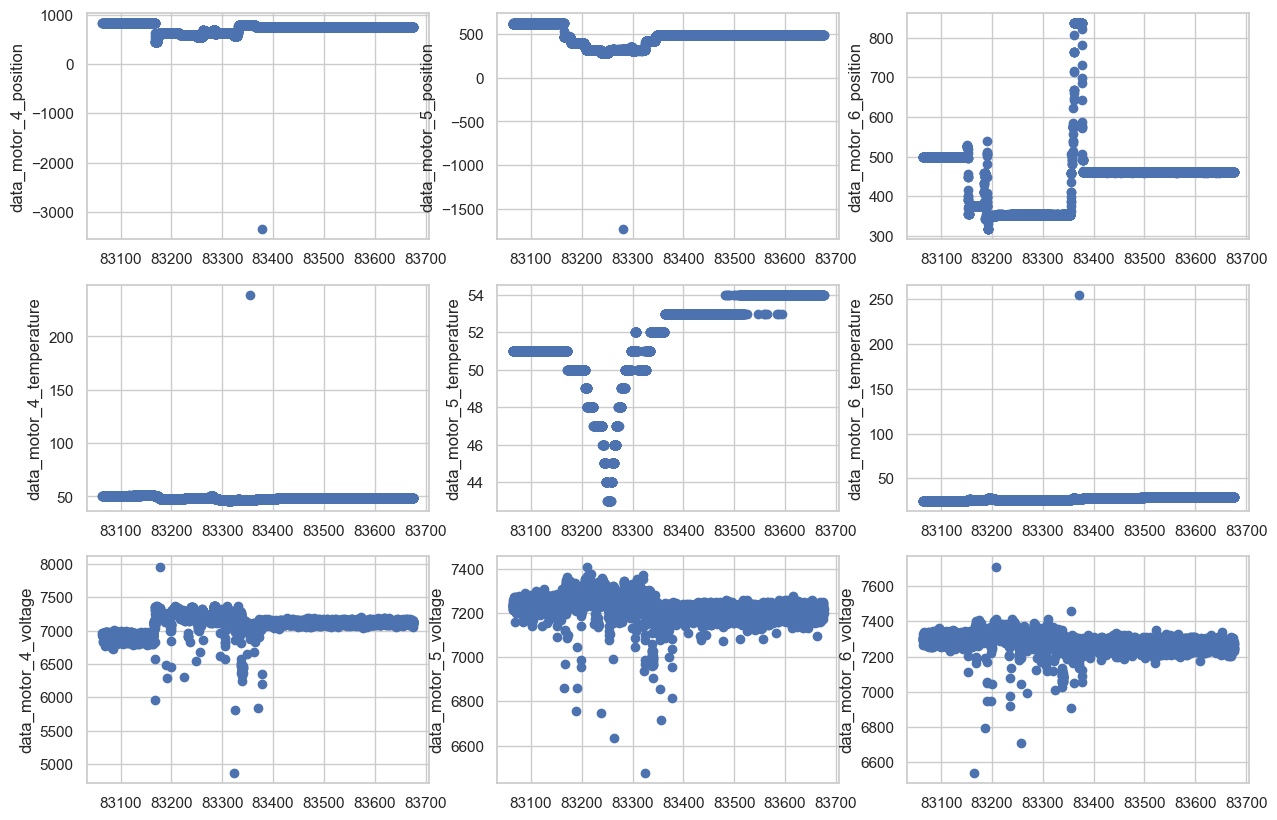

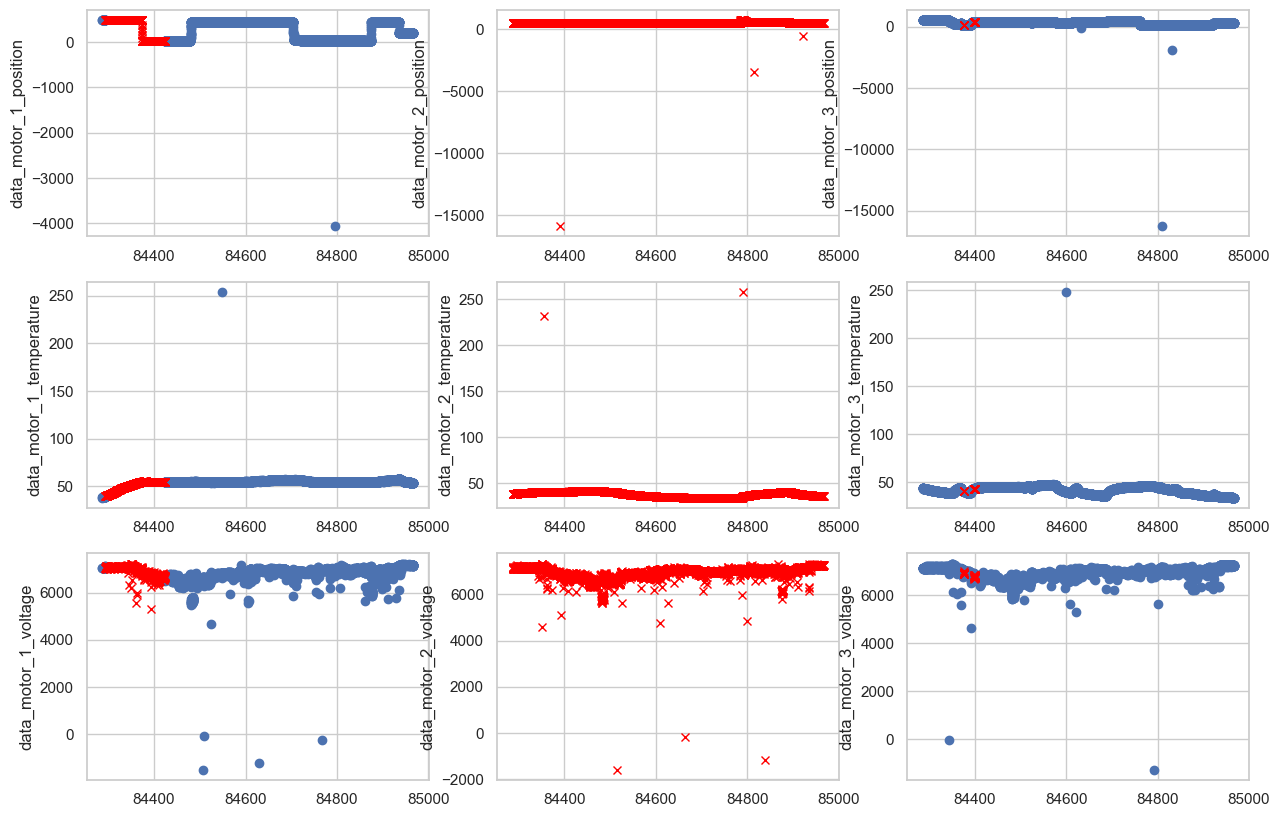

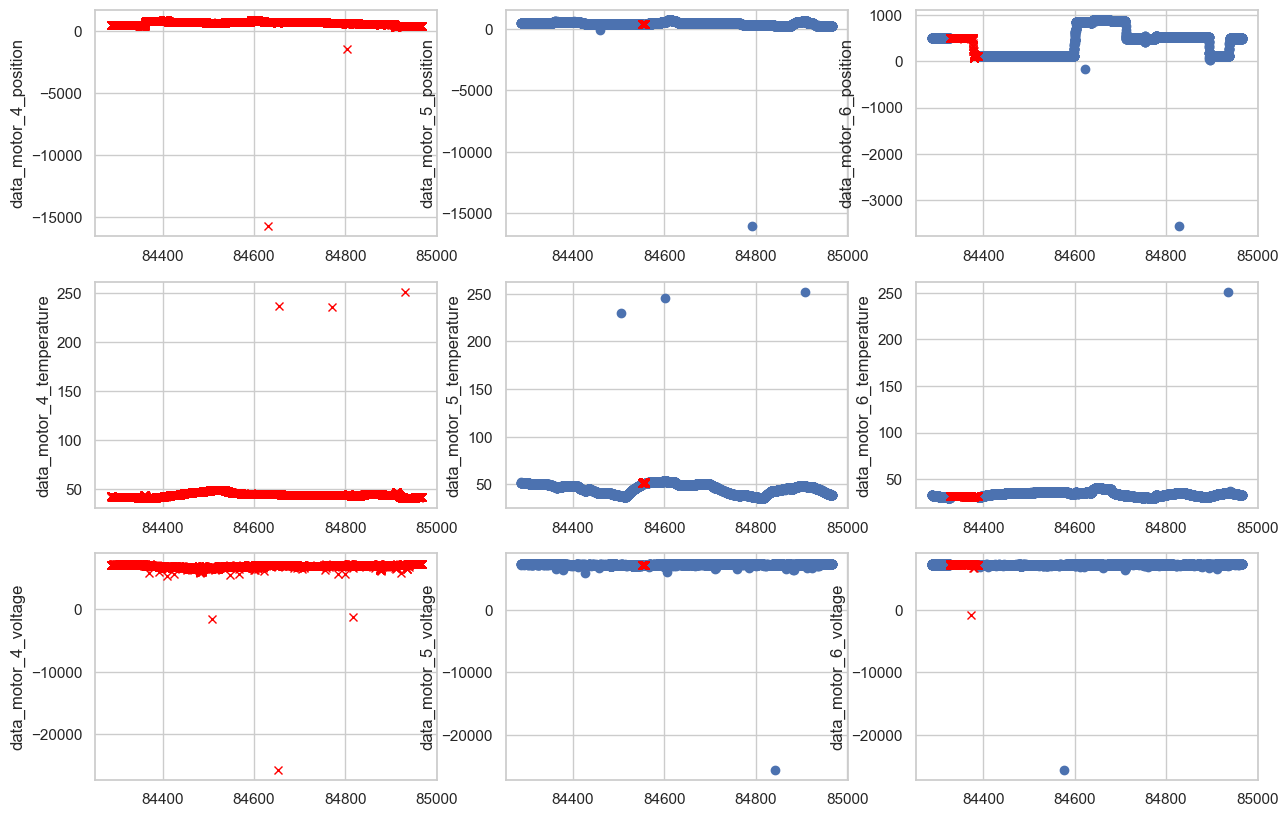

In [39]:
# Specify path to the dictionary.
base_dictionary = '../../dataset/training_data/'

# Read the data.
df_data = read_all_test_data_from_path(base_dictionary)

Please explain the structure (what does each column represent) of the resulted dataframe here.

The resulted dataframe represent the position, temperature and voltage for each of the 3 motors, as a function of time, and the label represents whether we failures (1 : red ) or normal data ( 0 : blue). Then the columns repeat these 4 pieces of information for each motor and the last column specifies the test condition.

In [40]:
df_data.head()

time  data_motor_1_position  data_motor_1_temperature  \
0  76522.025433                     86                        42   
1  76522.125464                     86                        42   
2  76522.225432                     86                        42   
3  76522.325432                     86                        42   
4  76522.425451                     86                        42   

   data_motor_1_voltage  data_motor_1_label  data_motor_2_position  \
0                  7223                   0                    501   
1                  7214                   0                    502   
2                  7137                   0                    501   
3                  7135                   0                    501   
4                  7212                   0                    502   

   data_motor_2_temperature  data_motor_2_voltage  data_motor_2_label  \
0                        31                  7334                   0   
1                        31                  7250                   0   
2                        31                  7234                   0   
3                        31                  7250                   0   
4                        31                  7232                   0   

   data_motor_3_position  ...  data_motor_4_label  data_motor_5_position  \
0                     80  ...                   0                    619   
1                     80  ...                   0                    619   
2                     79  ...                   0                    619   
3                     79  ...                   0                    619   
4                     79  ...                   0                    619   

   data_motor_5_temperature  data_motor_5_voltage  data_motor_5_label  \
0                        43                  7312                   0   
1                        43                  7332                   0   
2                        43                  7330                   0   
3                        43                  7319                   0   
4                        43                  7348                   0   

   data_motor_6_position  data_motor_6_temperature  data_motor_6_voltage  \
0                    500                        24                  7361   
1                    499                        24                  7372   
2                    499                        24                  7356   
3                    499                        24                  7374   
4                    499                        24                  7365   

   data_motor_6_label   test_condition  
0                   0  20240105_164214  
1                   0  20240105_164214  
2                   0  20240105_164214  
3                   0  20240105_164214  
4                   0  20240105_164214  

[5 rows x 26 columns]

## Sub-task 2: Data visualization

Visualize the data. By examing the data, you can answer the following questions:
- Do we have a lot noise in the features? Do we need to smooth the data?
- Do we need to scale the features?
- Do we have a lot of outliers? Do we need to remove them?
- Do we have a lot of missing values? Do we need to fill them?
- In general, do you discover some patterns regarding how temperature of the motor changes?
- If we compare the normal data (label = 0) with the failures (label=1), could you see some difference in the pattern of the temperature?

**Submit your summary below:**

- Noise : The duplicated horizontal lines in the position graphs represent noise in the dataset. Nonetheless, there is a lot of noise in the voltage dataframes. We need to smooth the data for the Voltage dataframe.

- Scaling : The need to scale the features comes with the choice of the machine learning model implemented, for example voltage is on a much larger scale, and if we choose models such as SVM or neural networks, voltage will have a much greater importance for the classifier than the other features due to its scale. However, these problems do not occur with models such as decision trees. We chose to normalize the features because they don't have bell curves, which means that standardization may not work so well

- Outliers : Some outliers in the voltage dataframes. If an outlier is due to a natural vibration, we should not remove it. However, since we use normalization to treat the data, which is very sensitive to outliers, we should remove them. Furthermore, in the event that something deviates from what is physically expected, such as a temperature below 0 degrees, we should also remove the outlier. 

- No missing values

- Patterns of the temperature:

- Comparing normal data with the failures: 

In [41]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31135 entries, 0 to 31134
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      31135 non-null  float64
 1   data_motor_1_position     31135 non-null  int64  
 2   data_motor_1_temperature  31135 non-null  int64  
 3   data_motor_1_voltage      31135 non-null  int64  
 4   data_motor_1_label        31135 non-null  int64  
 5   data_motor_2_position     31135 non-null  int64  
 6   data_motor_2_temperature  31135 non-null  int64  
 7   data_motor_2_voltage      31135 non-null  int64  
 8   data_motor_2_label        31135 non-null  int64  
 9   data_motor_3_position     31135 non-null  int64  
 10  data_motor_3_temperature  31135 non-null  int64  
 11  data_motor_3_voltage      31135 non-null  int64  
 12  data_motor_3_label        31135 non-null  int64  
 13  data_motor_4_position     31135 non-null  int64  
 14  data_m

In [42]:
df_data.describe()

time  data_motor_1_position  data_motor_1_temperature  \
count  31135.000000           31135.000000              31135.000000   
mean   80141.374898             179.055436                 42.888614   
std     3283.277642             174.029043                  9.239940   
min    76522.025433           -4060.000000                 27.000000   
25%    77405.635319              68.000000                 34.000000   
50%    77789.390419              85.000000                 45.000000   
75%    83562.256764             433.000000                 48.000000   
max    84966.826470             614.000000                255.000000   

       data_motor_1_voltage  data_motor_1_label  data_motor_2_position  \
count          31135.000000        31135.000000           31135.000000   
mean            7011.690413            0.041497             499.383491   
std              243.136244            0.199439             101.648912   
min            -1492.000000            0.000000          -15883.000000   
25%             6857.000000            0.000000             501.000000   
50%             7041.000000            0.000000             501.000000   
75%             7163.000000            0.000000             502.000000   
max             7552.000000            1.000000             836.000000   

       data_motor_2_temperature  data_motor_2_voltage  data_motor_2_label  \
count              31135.000000          31135.000000        31135.000000   
mean                  32.084021           7117.306729            0.213650   
std                    4.943349            230.867349            0.409889   
min                   28.000000          -1587.000000            0.000000   
25%                   28.000000           6966.000000            0.000000   
50%                   29.000000           7137.000000            0.000000   
75%                   35.000000           7265.000000            0.000000   
max                  258.000000           7605.000000            1.000000   

       data_motor_3_position  ...  data_motor_4_voltage  data_motor_4_label  \
count           31135.000000  ...          31135.000000        31135.000000   
mean              146.937466  ...           7129.718741            0.213650   
std               162.818409  ...            283.222422            0.409889   
min            -16245.000000  ...         -25689.000000            0.000000   
25%                79.000000  ...           6968.000000            0.000000   
50%                80.000000  ...           7135.000000            0.000000   
75%               153.000000  ...           7288.000000            0.000000   
max               528.000000  ...           7955.000000            1.000000   

       data_motor_5_position  data_motor_5_temperature  data_motor_5_voltage  \
count           31135.000000               31135.00000          31135.000000   
mean              522.873422                  47.74572           7257.833788   
std               153.230674                   4.62357            201.510067   
min            -16045.000000                  36.00000         -25514.000000   
25%               419.000000                  46.00000           7226.000000   
50%               521.000000                  49.00000           7252.000000   
75%               619.000000                  50.00000           7305.000000   
max               869.000000                 252.00000           7425.000000   

       data_motor_5_label  data_motor_6_position  data_motor_6_temperature  \
count        31135.000000           31135.000000              31135.000000   
mean             0.002248             444.334672                 28.998651   
std              0.047363             157.961084                  4.436051   
min              0.000000           -3561.000000                 24.000000   
25%              0.000000             460.000000                 26.000000   
50%              0.000000             498.000000                 28.000000   
75%              0.000000 

In [43]:
#No missing values:
df_data.isnull().sum().sum()

# no infinity values 
pd.isna(df_data).sum().sum()

0

## Sub-task 3 Explore the distribution of each feature through histogram and box plot.

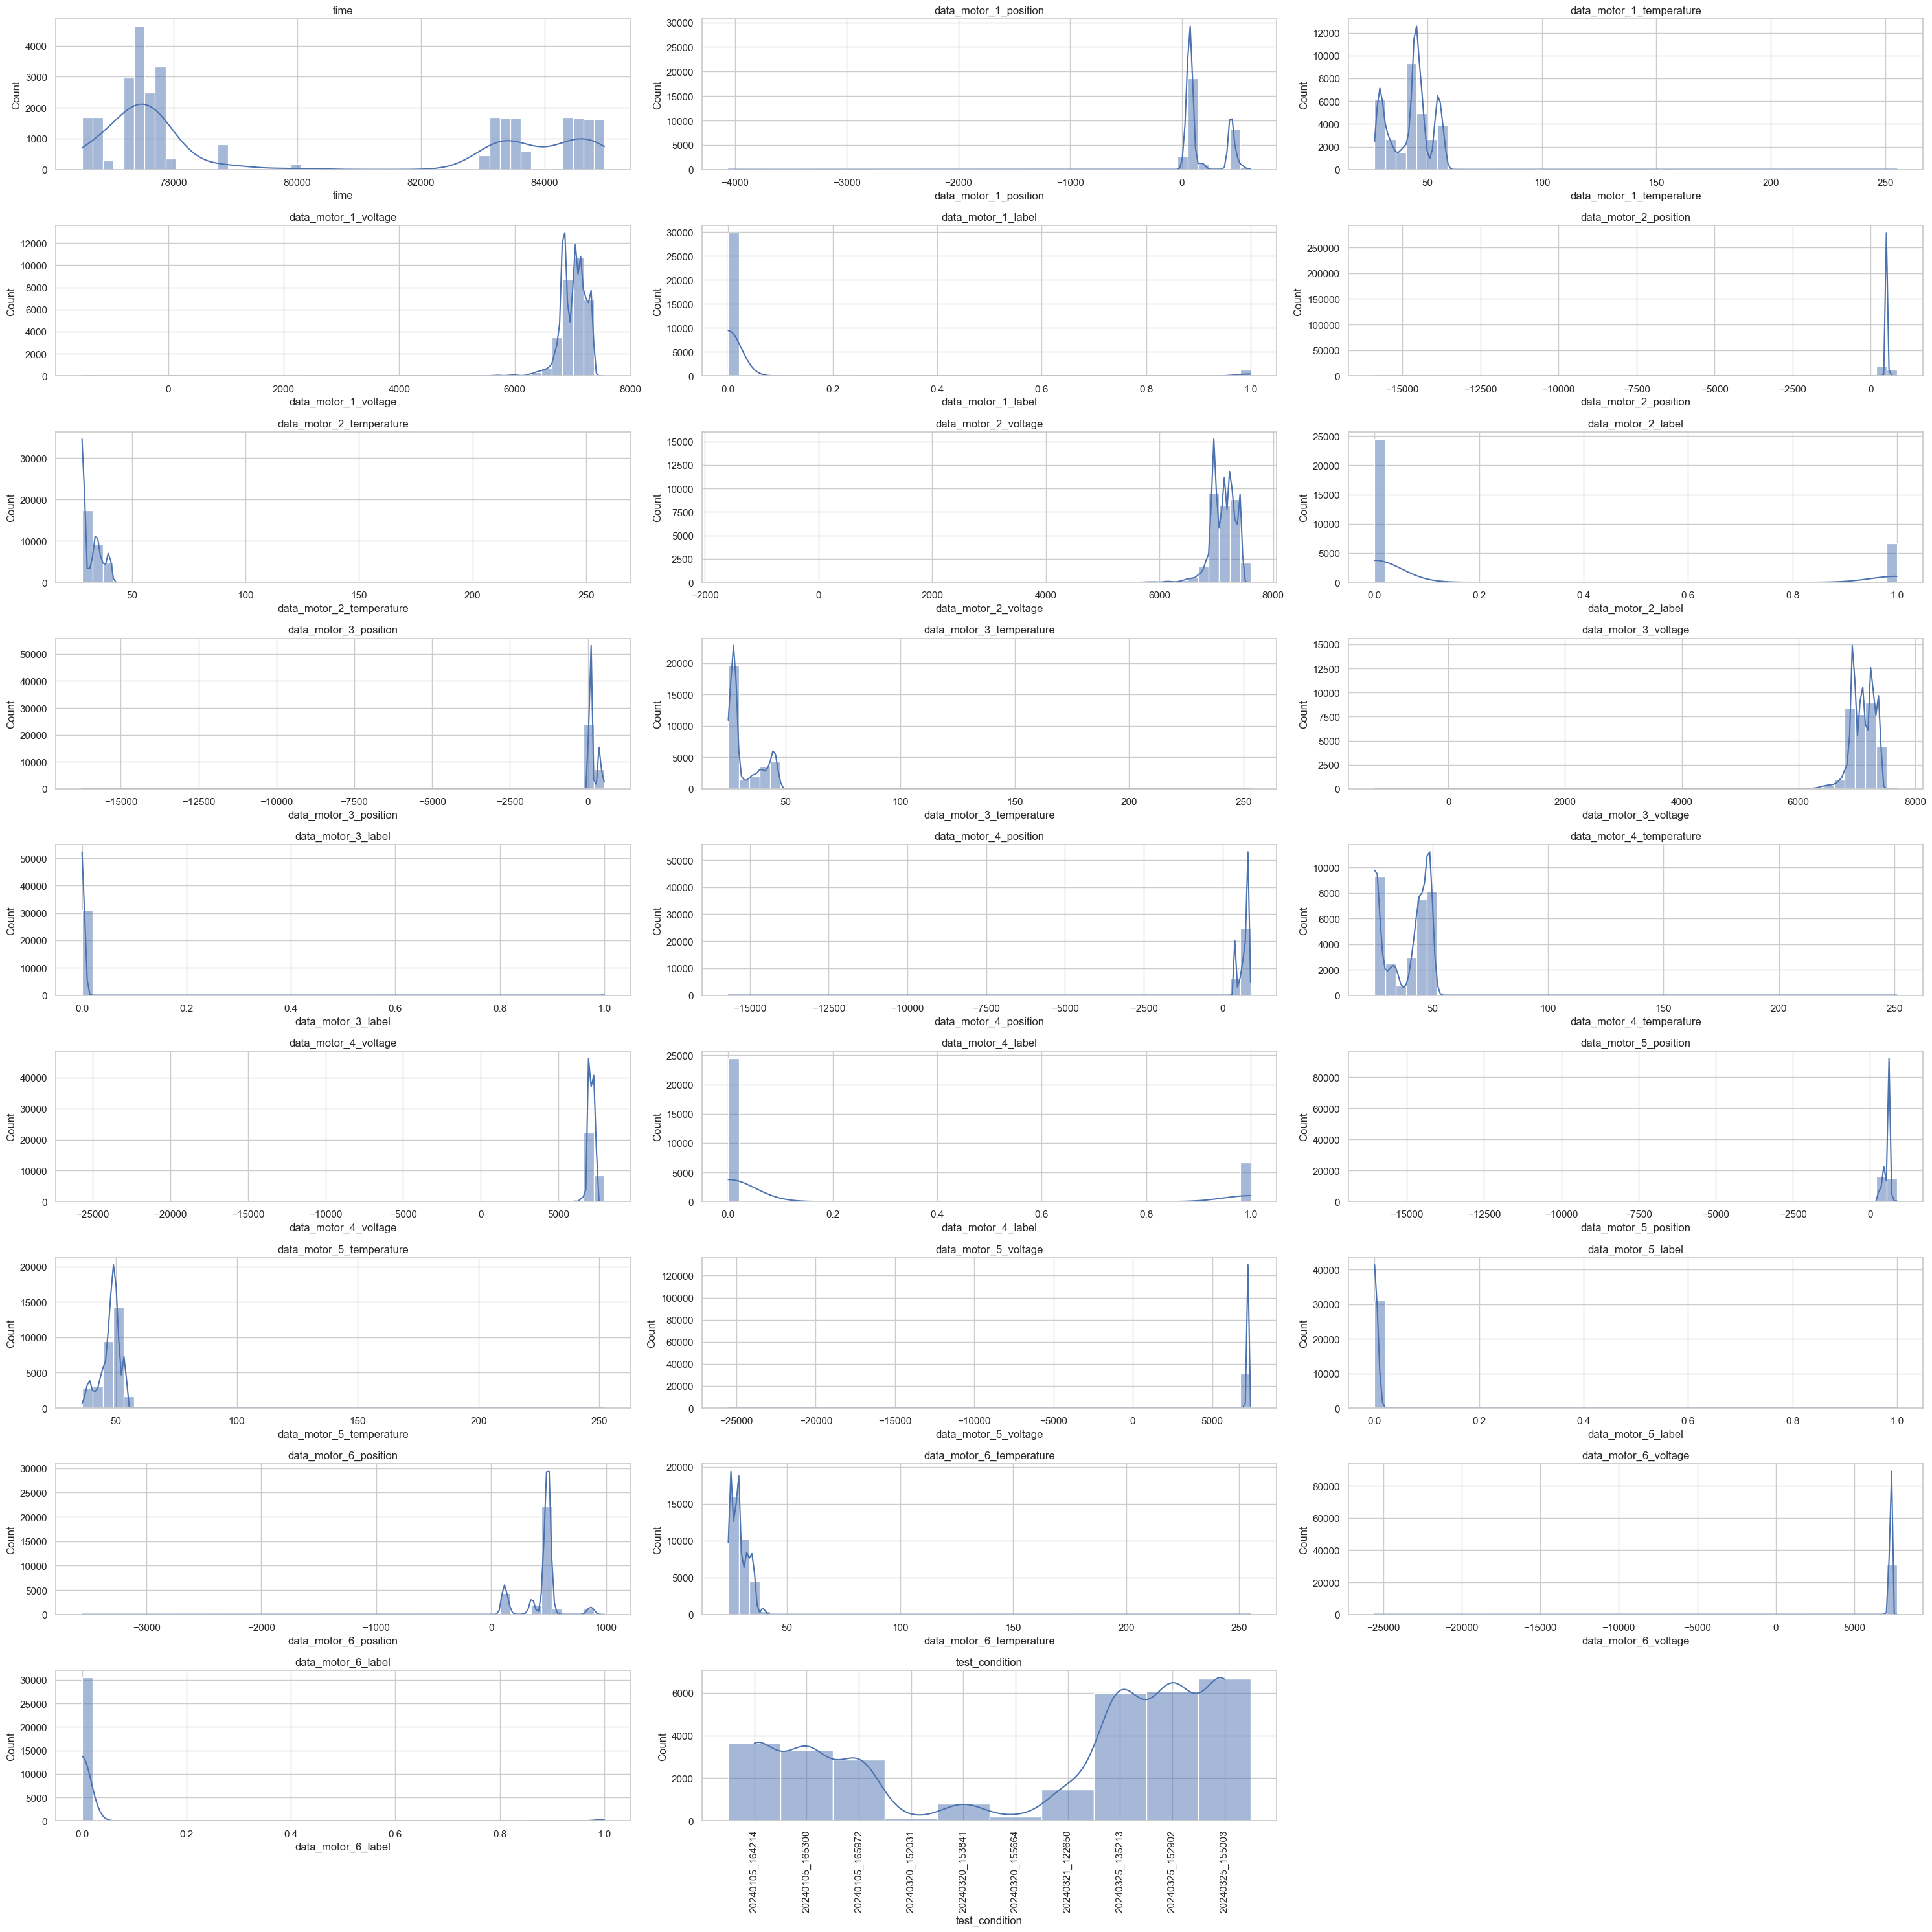

In [86]:
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('mode.use_inf_as_na', True)
sns.set(style="whitegrid")

plt.figure(figsize=(30, 30))
for col in df_data.columns:
    plt.subplot(df_data.shape[1] // 3 + 1, 3, list(df_data.columns).index(col) + 1)
    sns.histplot(df_data[col], kde=True, bins=50)
    plt.title(col)
    if col == df_data.columns[-1]:  # the values on the x-axis of the last graph were overlapping
        plt.xticks(rotation=90)  
plt.tight_layout()
plt.tight_layout()
plt.show()

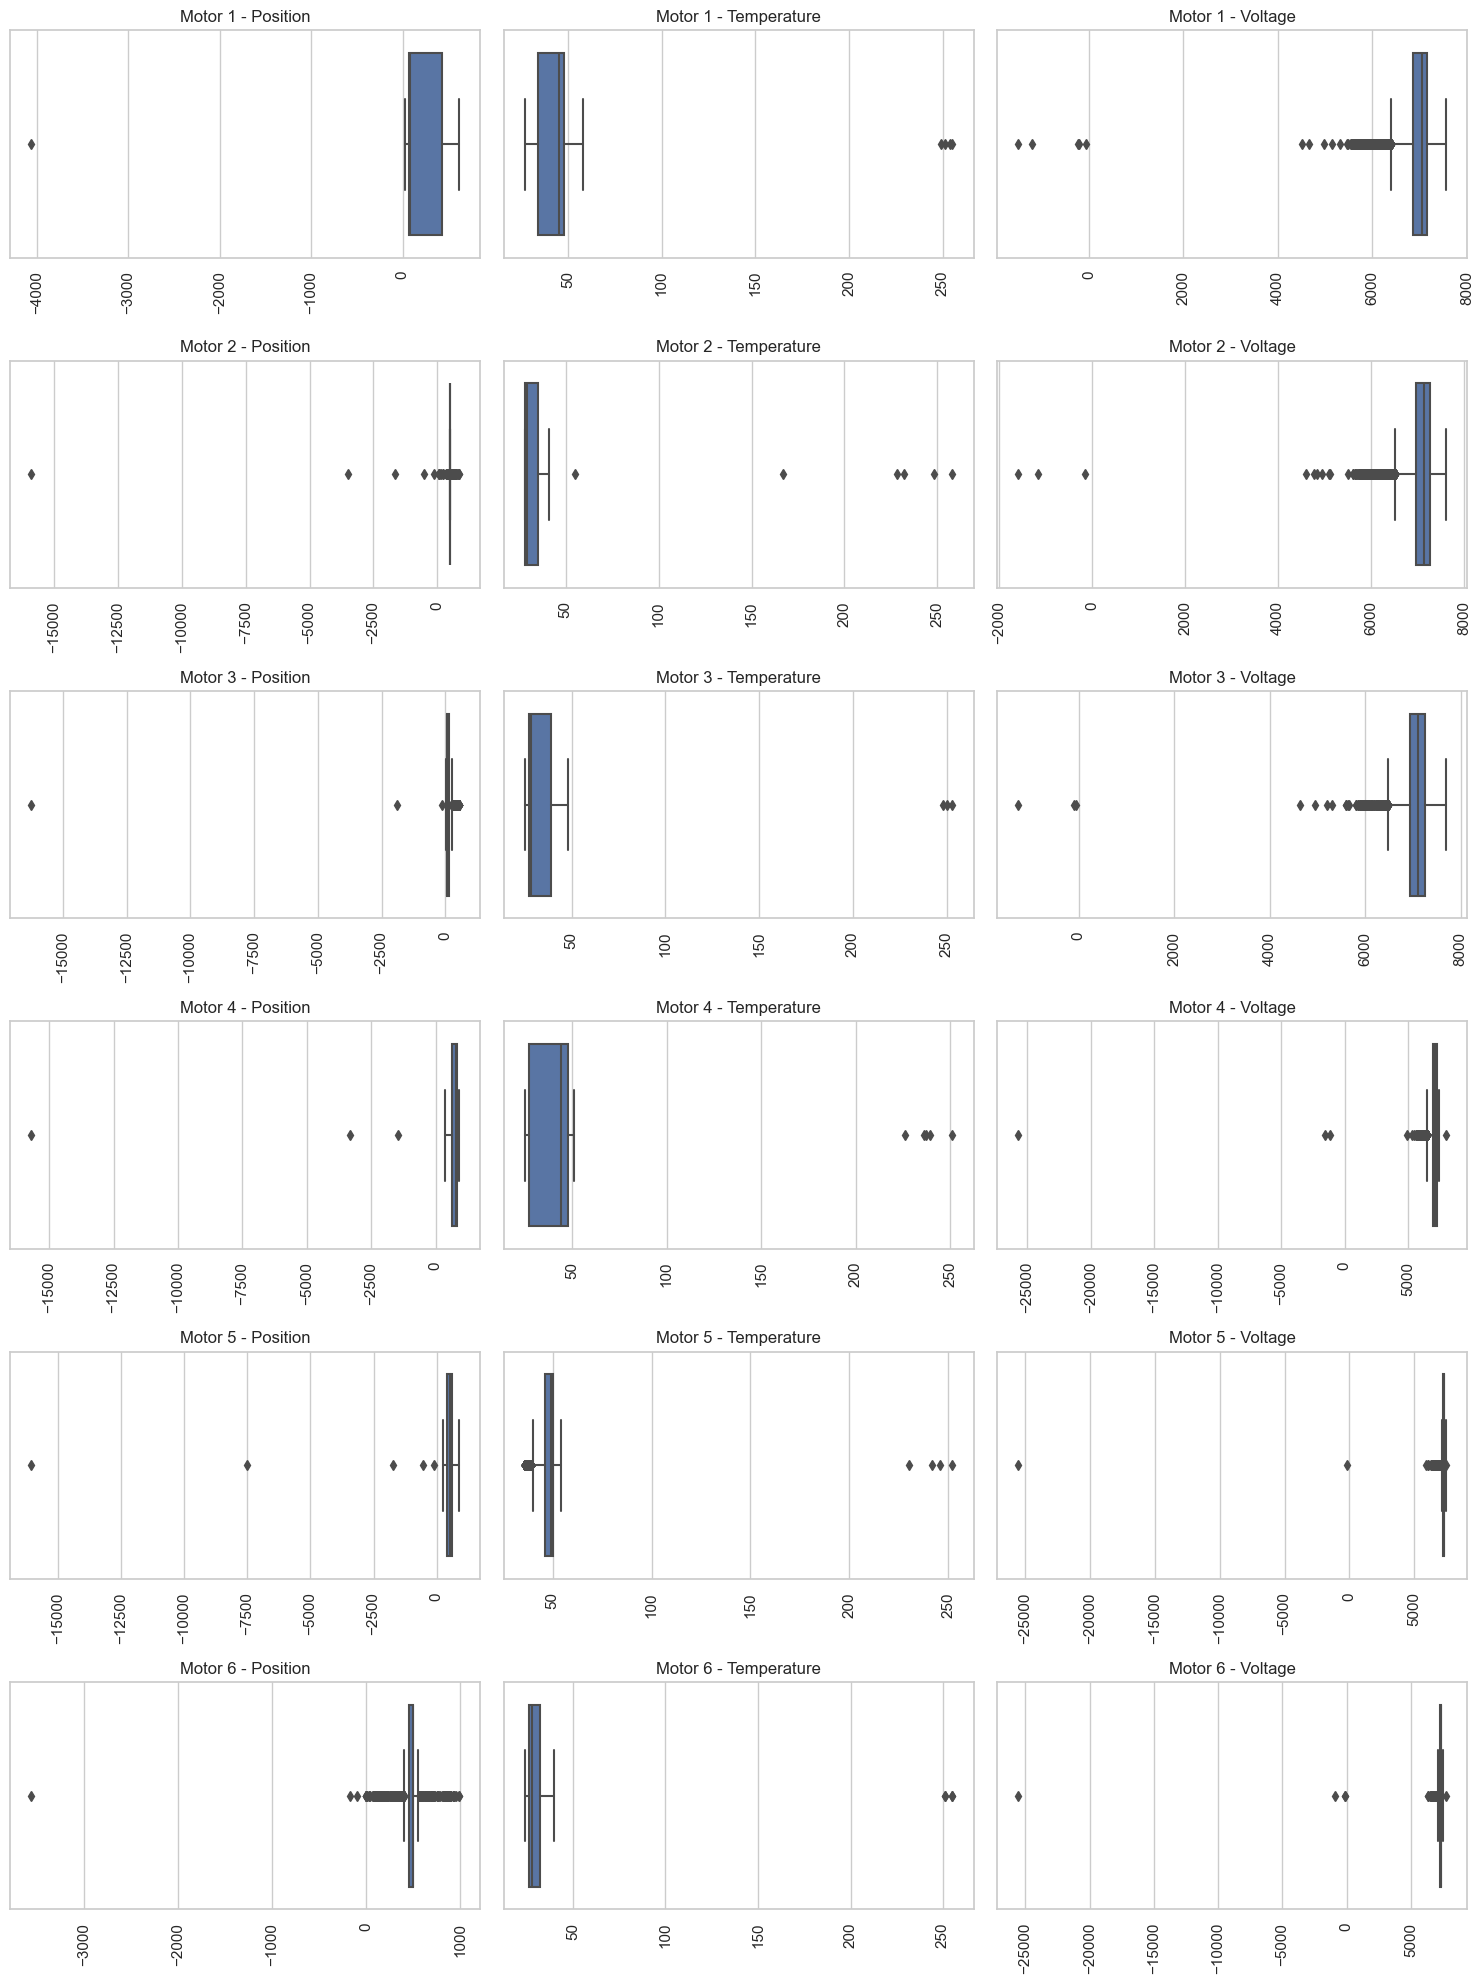

In [85]:
motor_features = ['position', 'temperature', 'voltage']

fig, axs = plt.subplots(6, 3, figsize=(15, 20))

for i in range(1, 7):
    for j, feature in enumerate(motor_features):
        data = df_data[f'data_motor_{i}_{feature}']
        sns.boxplot(x=data, ax=axs[i-1, j])
        axs[i-1, j].set_title(f'Motor {i} - {feature.capitalize()}')
        axs[i-1, j].set_xlabel('')
        axs[i-1, j].set_ylabel('')
        axs[i-1, j].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

## Sub-task 4 Use PCA to visulize the data in a 2-d plane.

Normally, before any further analysis, we try to plot all the features directly in a 2-d plane. This is because the 2-d plane is a very simple representation of the data and allows us to visually inspect the patterns of the data. A normal conclusion we can make is whether the data are linear seperable or not, i.e., if you can simply fit a straight line to seperate postitive and negative classes. However, if the data is high-dimensional, it is difficult to visualize it in a 2-d plane. In this case, we can use PCA to reduce the dimensionality of the data and then plot it in a 2-d plane.

Below is a code for performing PCA and plotting the data in a 2-d plane. What can you see from the results?

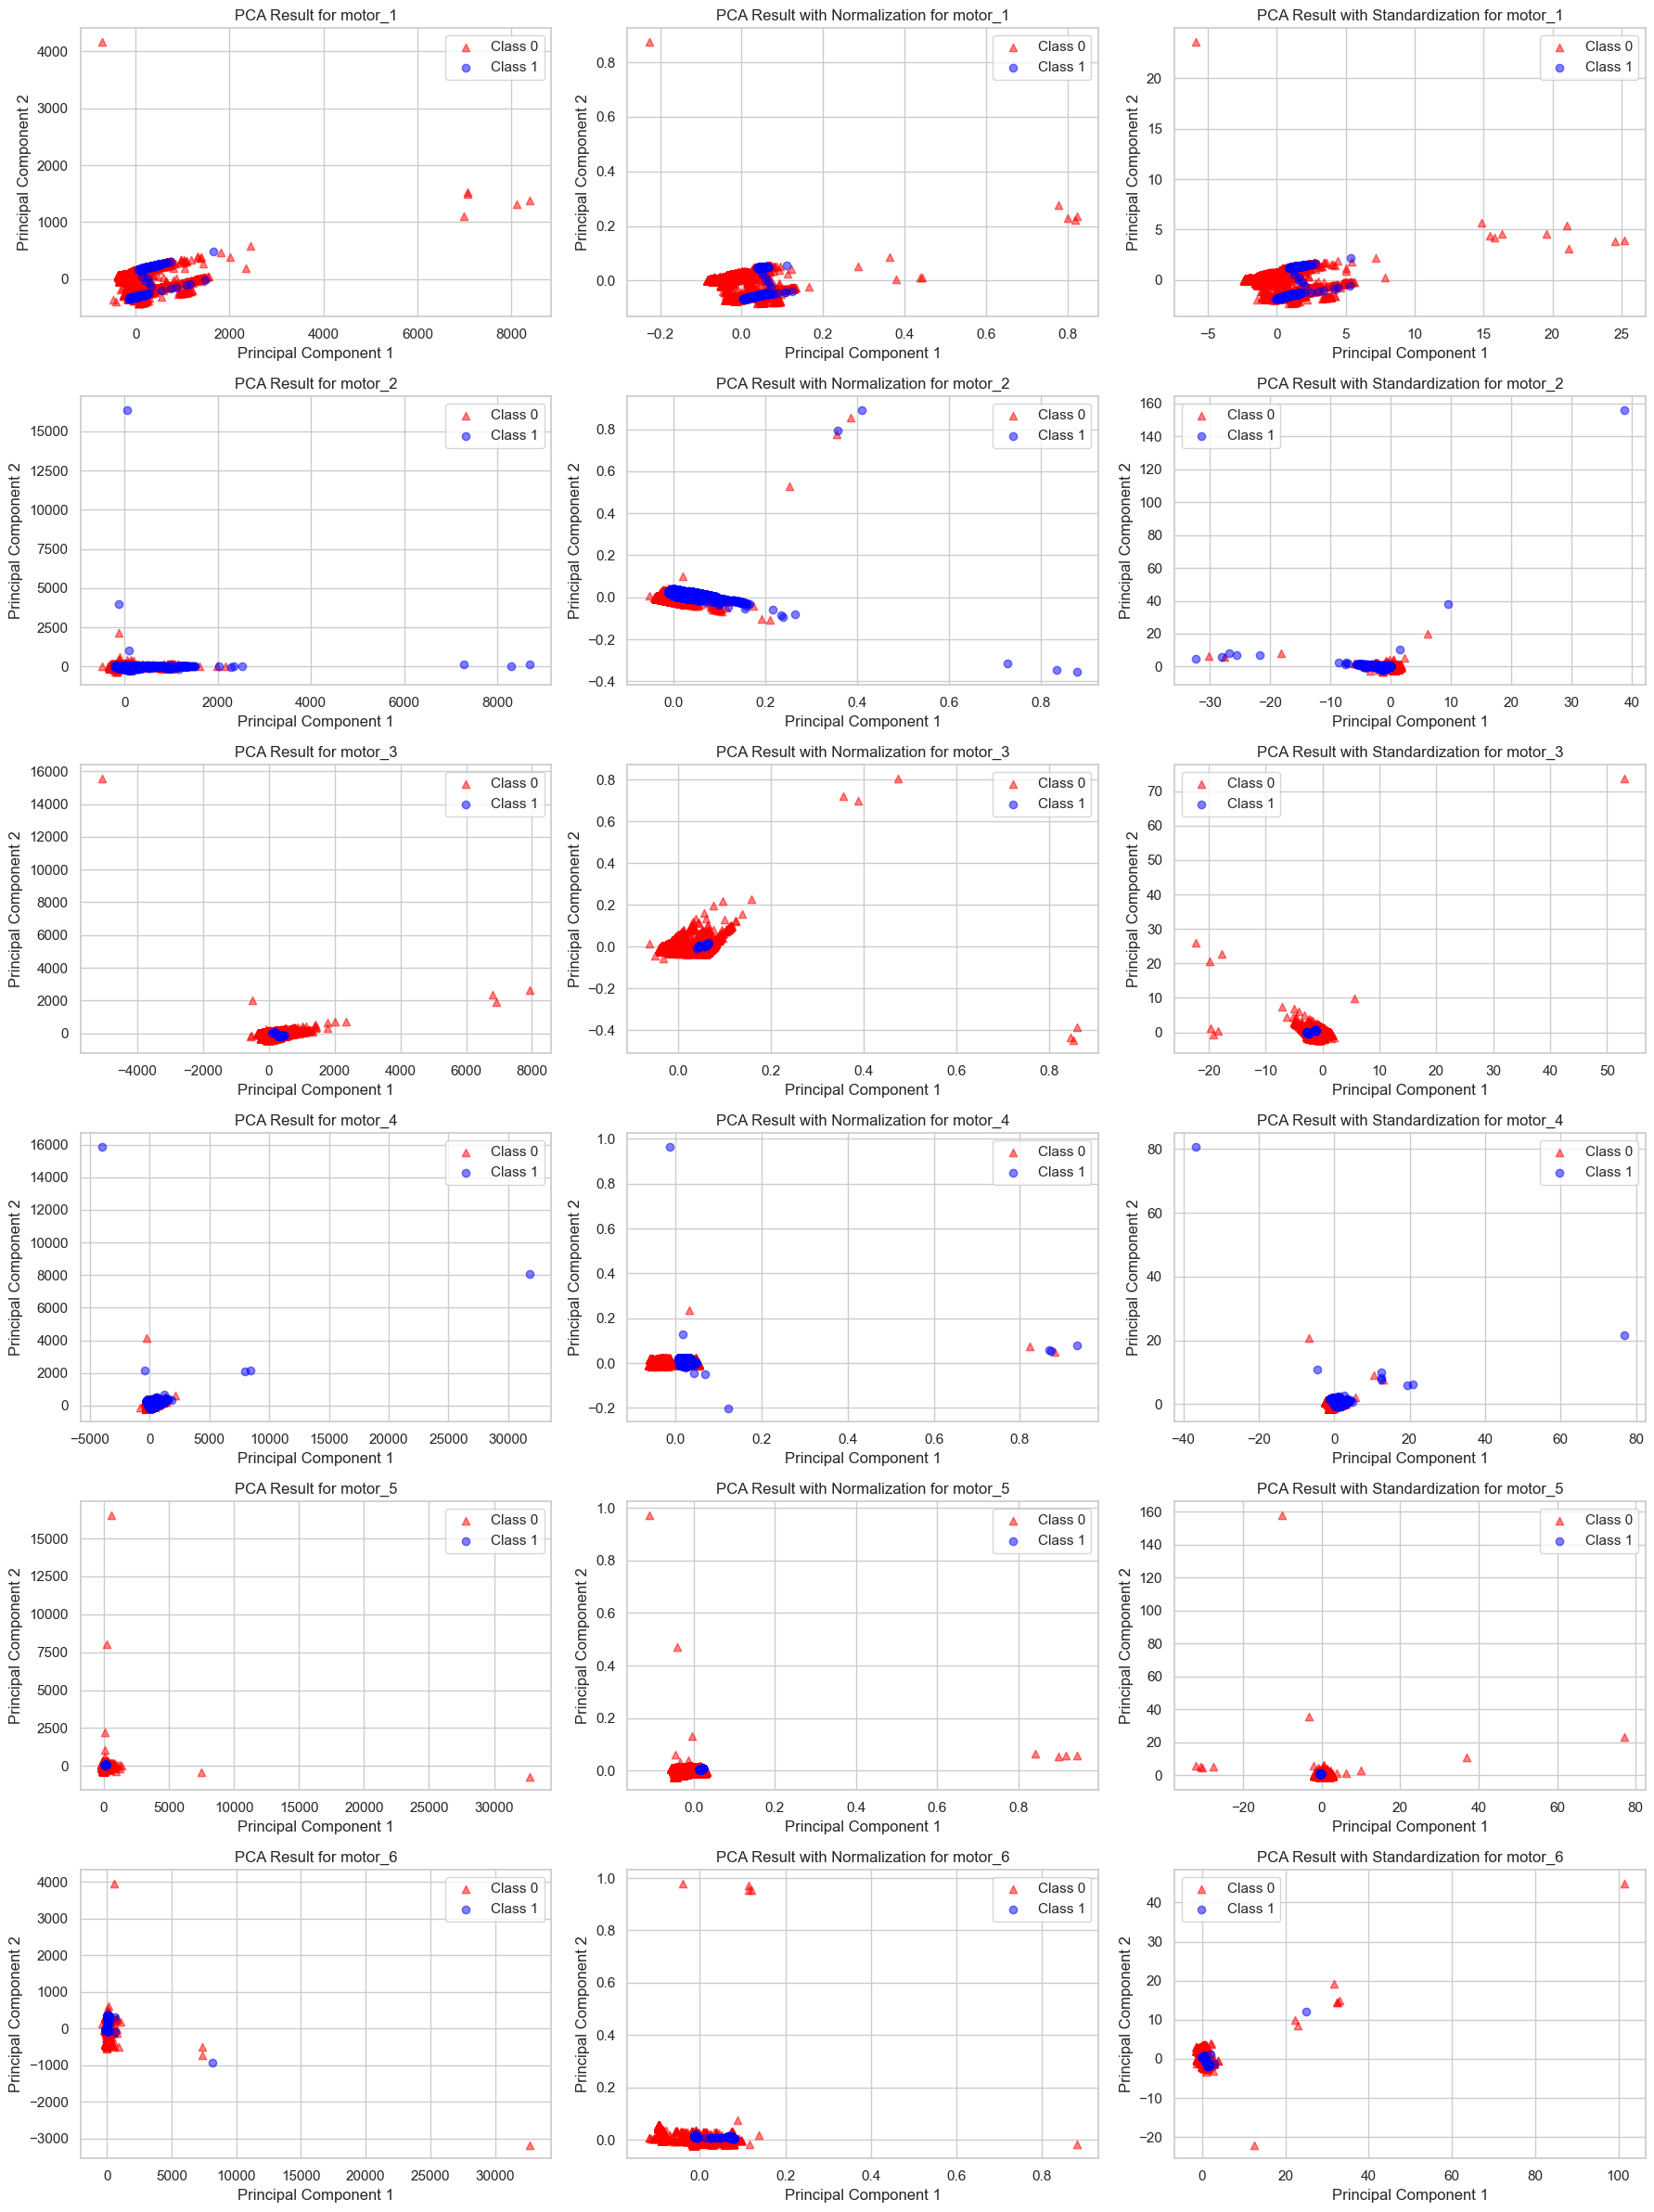

In [199]:
df = df_data.drop(columns=['time','test_condition']) 

fig, axs = plt.subplots(6, 3, figsize=(18, 24))

for i in range(1, 7):
    # PCA 
    X = df[[f'data_motor_{i}_position', f'data_motor_{i}_temperature', f'data_motor_{i}_voltage']]
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    y = df_data[f'data_motor_{i}_label']

    axs[i-1, 0].scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    axs[i-1, 0].scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    axs[i-1, 0].set_title(f'PCA Result for motor_{i}')
    axs[i-1, 0].set_xlabel('Principal Component 1')
    axs[i-1, 0].set_ylabel('Principal Component 2')
    axs[i-1, 0].legend()
    
    #PCA with normalization
    scaler = scaler = MinMaxScaler()
    X_train_normalized = scaler.fit_transform(X)
    pca_normalized = PCA(n_components=2)
    X_pca_normalized = pca_normalized.fit_transform(X_train_normalized)

    axs[i-1, 1].scatter(X_pca_normalized[y == 0, 0], X_pca_normalized[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    axs[i-1, 1].scatter(X_pca_normalized[y == 1, 0], X_pca_normalized[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    axs[i-1, 1].set_title(f'PCA Result with Normalization for motor_{i}')
    axs[i-1, 1].set_xlabel('Principal Component 1')
    axs[i-1, 1].set_ylabel('Principal Component 2')
    axs[i-1, 1].legend()

    # PCA with standardization
    scaler = StandardScaler()
    X_train_standard = scaler.fit_transform(X)
    pca_standard = PCA(n_components=2)
    X_pca_standard = pca_standard.fit_transform(X_train_standard)

    axs[i-1, 2].scatter(X_pca_standard[y == 0, 0], X_pca_standard[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    axs[i-1, 2].scatter(X_pca_standard[y == 1, 0], X_pca_standard[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    axs[i-1, 2].set_title(f'PCA Result with Standardization for motor_{i}')
    axs[i-1, 2].set_xlabel('Principal Component 1')
    axs[i-1, 2].set_ylabel('Principal Component 2')
    axs[i-1, 2].legend()

plt.tight_layout()
plt.show()

In the above analysis, we did not perform data normalization/standardization. Could you try to do that and see if the results change? You can use the follwing code for standardization:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
```

And this for normalization:

```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
```

We have to remove the outliers before scaling, so I changed the order of the tasks. We also thought it would be simpler to start by smoothing, then removing outliers and normalizing

# Task 2 Data cleaning and preprocessing

## Task 1: Define a strategy to smooth the data.

Explain how do you smooth the data and implement your approach here.

In [200]:
def smooth_data_moving_average(data, window_size):
    """Smooth data by computing moving average."""
    return data.rolling(window=window_size, min_periods=1).mean()

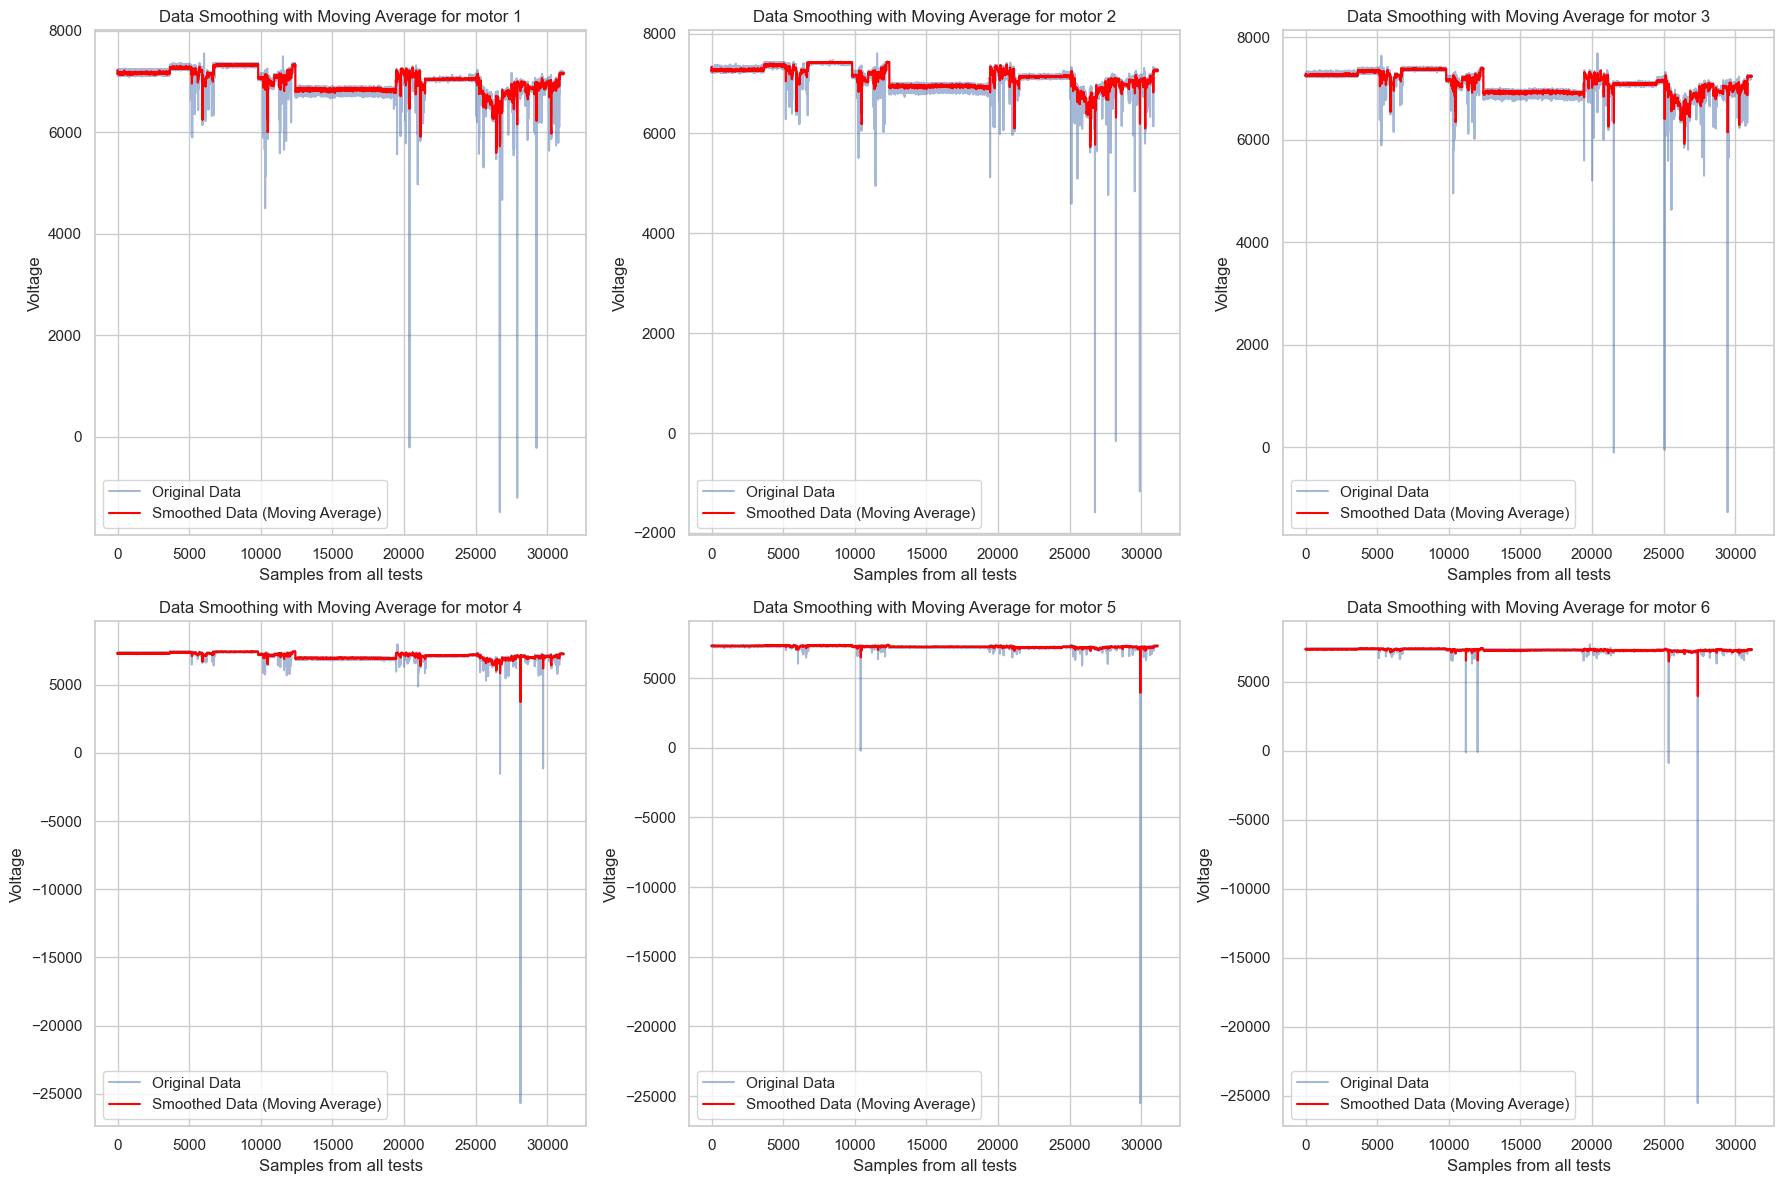

In [206]:
window_size = 10

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

smoothed_data = df_data.copy(deep=True)
smoothed_data.drop(columns=['time','test_condition'], inplace=True)

for i in range(1,7):
    smoothed_data[f'data_motor_{i}_voltage'] = smooth_data_moving_average(df_data[f'data_motor_{i}_voltage'], window_size)

    # Plot the original and smoothed data
    axs[(i-1)//3, (i-1)%3].plot(df_data[f'data_motor_{i}_voltage'], label='Original Data', alpha=0.5)
    axs[(i-1)//3, (i-1)%3].plot(smoothed_data[f'data_motor_{i}_voltage'], label='Smoothed Data (Moving Average)', color='red')
    axs[(i-1)//3, (i-1)%3].set_title(f'Data Smoothing with Moving Average for motor {i}')
    axs[(i-1)//3, (i-1)%3].set_xlabel('Samples from all tests')
    axs[(i-1)//3, (i-1)%3].set_ylabel('Voltage')
    axs[(i-1)//3, (i-1)%3].legend()
plt.tight_layout()
plt.show()

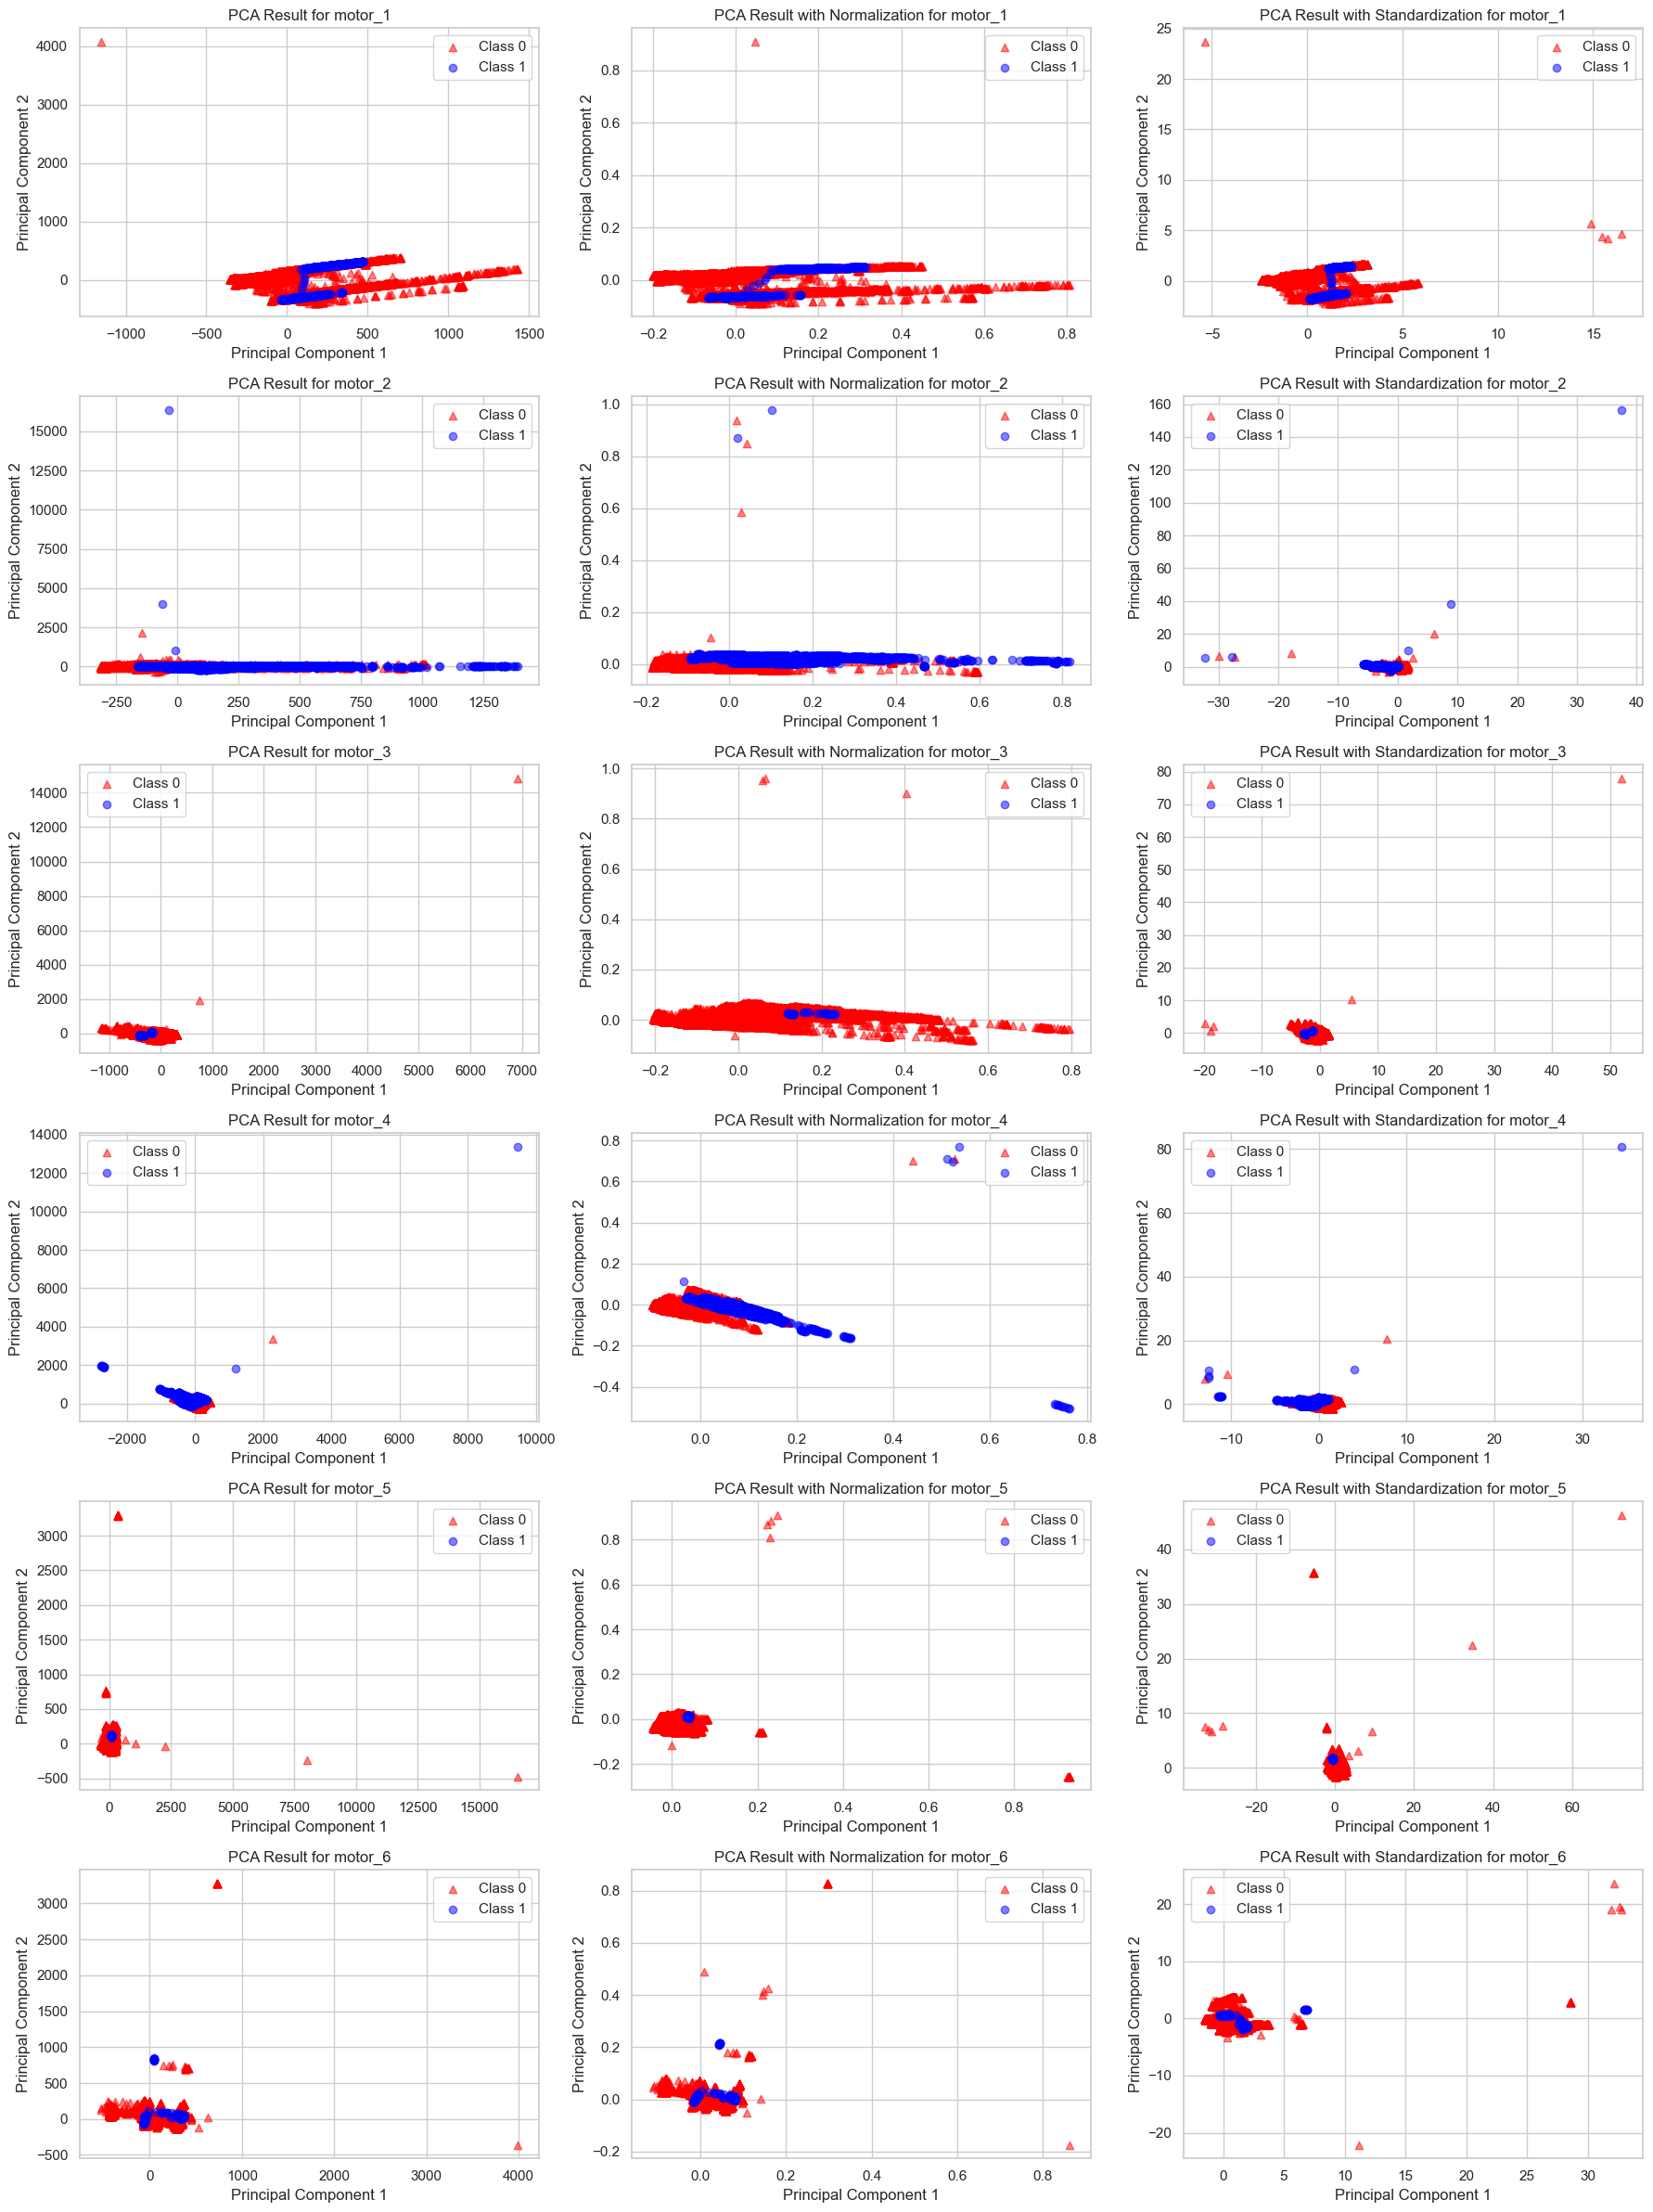

In [207]:
fig, axs = plt.subplots(6, 3, figsize=(18, 24))

for i in range(1, 7):
    
    X = smoothed_data[[f'data_motor_{i}_position', f'data_motor_{i}_temperature', f'data_motor_{i}_voltage']]
    
    # PCA 
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    y = smoothed_data[f'data_motor_{i}_label']

    axs[i-1, 0].scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    axs[i-1, 0].scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    axs[i-1, 0].set_title(f'PCA Result for motor_{i}')
    axs[i-1, 0].set_xlabel('Principal Component 1')
    axs[i-1, 0].set_ylabel('Principal Component 2')
    axs[i-1, 0].legend()
    
    #PCA with normalization
    scaler = scaler = MinMaxScaler()
    X_train_normalized = scaler.fit_transform(X)
    pca_normalized = PCA(n_components=2)
    X_pca_normalized = pca_normalized.fit_transform(X_train_normalized)

    axs[i-1, 1].scatter(X_pca_normalized[y == 0, 0], X_pca_normalized[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    axs[i-1, 1].scatter(X_pca_normalized[y == 1, 0], X_pca_normalized[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    axs[i-1, 1].set_title(f'PCA Result with Normalization for motor_{i}')
    axs[i-1, 1].set_xlabel('Principal Component 1')
    axs[i-1, 1].set_ylabel('Principal Component 2')
    axs[i-1, 1].legend()

    # PCA with standardization
    scaler = StandardScaler()
    X_train_standard = scaler.fit_transform(X)
    pca_standard = PCA(n_components=2)
    X_pca_standard = pca_standard.fit_transform(X_train_standard)

    axs[i-1, 2].scatter(X_pca_standard[y == 0, 0], X_pca_standard[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    axs[i-1, 2].scatter(X_pca_standard[y == 1, 0], X_pca_standard[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    axs[i-1, 2].set_title(f'PCA Result with Standardization for motor_{i}')
    axs[i-1, 2].set_xlabel('Principal Component 1')
    axs[i-1, 2].set_ylabel('Principal Component 2')
    axs[i-1, 2].legend()

plt.tight_layout()
plt.show()

## Task 2: Define a strategy to remove outliers.

Explain how you remove the outliers and implement your approach here.

In [208]:
def remove_outliers(data, alpha):
        # Interquartile range method
        Q1 = data.quantile(0.25, numeric_only=True)
        Q3 = data.quantile(0.75, numeric_only=True)
        IQR = Q3 - Q1
        lower_bound = Q1 - alpha * IQR
        upper_bound = Q3 + alpha * IQR
        mask = ~((data.lt(lower_bound, axis=1)) | (data.gt(upper_bound, axis=1))).any(axis=1)
        return data[mask]

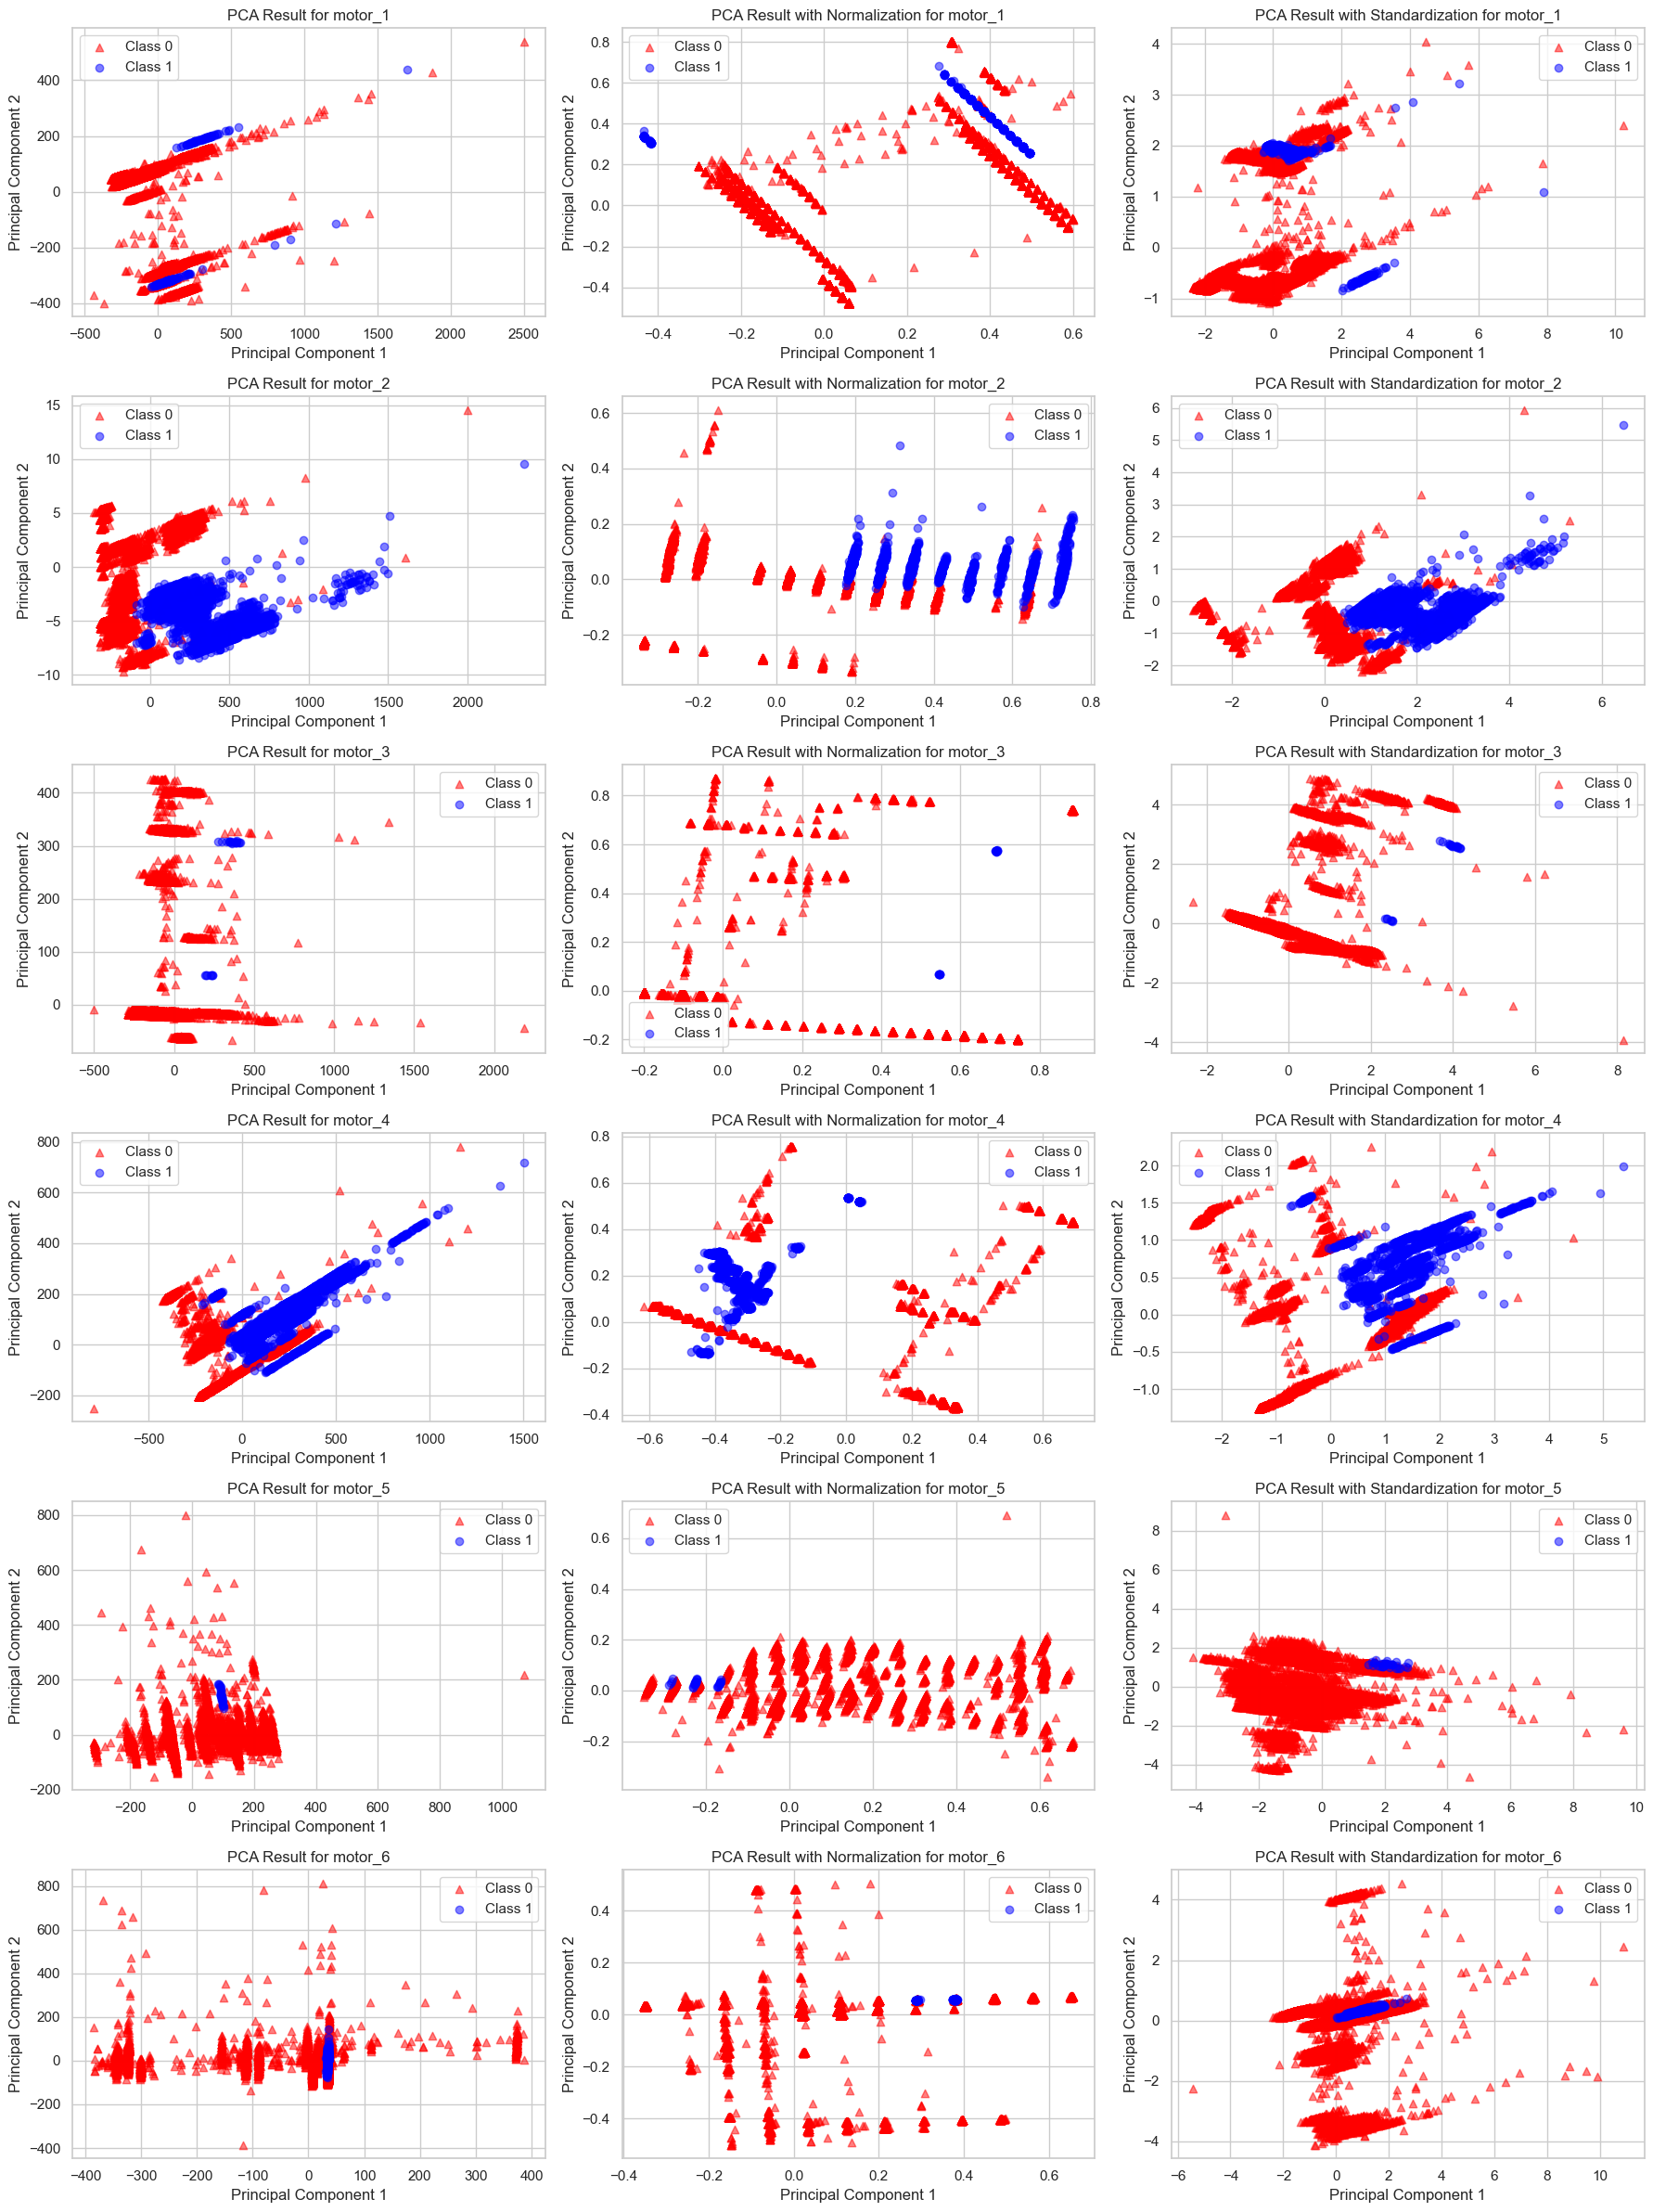

In [209]:
df = df_data.drop(columns=['time','test_condition'])

fig, axs = plt.subplots(6, 3, figsize=(18, 24))
for i in range(1, 7):

    # Initial separation of data by label to better visualize the PCA
    df_label0 = df[df[f'data_motor_{i}_label'] == 0]
    df_label1 = df[df[f'data_motor_{i}_label'] == 1]
    
    # We separate the outliers for each label separately
    df_label0_no_outliers = remove_outliers(df_label0, 10)
    df_label1_no_outliers = remove_outliers(df_label1, 10)

    df_no_outliers = pd.concat([df_label0_no_outliers, df_label1_no_outliers])
    
    X = df_no_outliers[[f'data_motor_{i}_position', f'data_motor_{i}_temperature', f'data_motor_{i}_voltage']]
    y = df_no_outliers[f'data_motor_{i}_label']
    
    ## PCA 
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    axs[i-1, 0].scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    axs[i-1, 0].scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    axs[i-1, 0].set_title(f'PCA Result for motor_{i}')
    axs[i-1, 0].set_xlabel('Principal Component 1')
    axs[i-1, 0].set_ylabel('Principal Component 2')
    axs[i-1, 0].legend()

    ##PCA with normalization
    scaler = scaler = MinMaxScaler()
    X_train_normalized = scaler.fit_transform(X)
    pca_normalized = PCA(n_components=2)
    X_pca_normalized = pca_normalized.fit_transform(X_train_normalized)

    axs[i-1, 1].scatter(X_pca_normalized[y == 0, 0], X_pca_normalized[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    axs[i-1, 1].scatter(X_pca_normalized[y == 1, 0], X_pca_normalized[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    axs[i-1, 1].set_title(f'PCA Result with Normalization for motor_{i}')
    axs[i-1, 1].set_xlabel('Principal Component 1')
    axs[i-1, 1].set_ylabel('Principal Component 2')
    axs[i-1, 1].legend()

    ## PCA with standardization
    scaler = StandardScaler()
    X_train_standard = scaler.fit_transform(X)
    pca_standard = PCA(n_components=2)
    X_pca_standard = pca_standard.fit_transform(X_train_standard)

    axs[i-1, 2].scatter(X_pca_standard[y == 0, 0], X_pca_standard[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    axs[i-1, 2].scatter(X_pca_standard[y == 1, 0], X_pca_standard[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    axs[i-1, 2].set_title(f'PCA Result with Standardization for motor_{i}')
    axs[i-1, 2].set_xlabel('Principal Component 1')
    axs[i-1, 2].set_ylabel('Principal Component 2')
    axs[i-1, 2].legend()
    
plt.tight_layout()
plt.show()

In general, the data is not linearly separable. 


The above analysis was only intended to visualize the impact of removing outliers in the PCA

Removing outliers in train and test:

In [210]:
label_columns = ['data_motor_1_label', 'data_motor_2_label', 'data_motor_3_label', 'data_motor_4_label', 'data_motor_5_label', 'data_motor_6_label']

df_features = smoothed_data.drop(columns=label_columns)

X = np.array(df_features)

# It is important to separate training and testing before normalization to avoid data leakage from training to testing in the future application of the machine learning model

#We have 18 candidates for the features, and each model will be applied to a specific motor, so there is a y for each motor
y_dict = {}
y_train_dict = {}
y_test_dict = {}

for i in range(1,7):
    y_dict[f'y_{i}'] = smoothed_data[f'data_motor_{i}_label']
    X_train, X_test, y_train_dict[f'y_{i}'], y_test_dict[f'y_{i}'] = train_test_split(X, y_dict[f'y_{i}'], test_size=0.2, random_state=42)

In [211]:
# Function to calculate percentage of data removed
def calculate_percentage_removed(original_shape, filtered_shape):
    return ((original_shape - filtered_shape) / original_shape) * 100

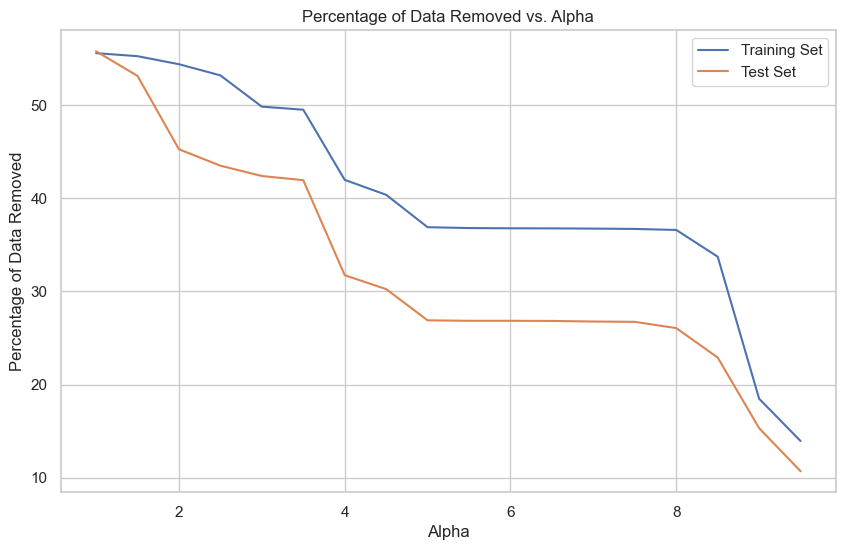

In [212]:
# Define alpha values
alphas = np.arange(1, 10, 0.5)

percentage_removed_train = []
percentage_removed_test = []

# Calculate percentage removed for each alpha
for alpha in alphas:
    X_train_no_outliers = np.array(remove_outliers(pd.DataFrame(X_train), alpha))
    X_test_no_outliers = np.array(remove_outliers(pd.DataFrame(X_test), alpha))
    percentage_removed_train.append(calculate_percentage_removed(X_train.shape[0], X_train_no_outliers.shape[0]))
    percentage_removed_test.append(calculate_percentage_removed(X_test.shape[0], X_test_no_outliers.shape[0]))

plt.figure(figsize=(10, 6))
plt.plot(alphas, percentage_removed_train, label='Training Set')
plt.plot(alphas, percentage_removed_test, label='Test Set')
plt.xlabel('Alpha')
plt.ylabel('Percentage of Data Removed')
plt.title('Percentage of Data Removed vs. Alpha')
plt.legend()
plt.grid(True)
plt.show()

With alpha < 8, we lose a lot of important data for classification, then we will choose alpha = 10

In [213]:
X_train_no_outliers = np.array(remove_outliers(pd.DataFrame(X_train), 10))
X_test_no_outliers = np.array(remove_outliers(pd.DataFrame(X_test), 10))

## Task 2: Normalize or Standardize the dataset..
Define your strategy to normalize the dataset and implement the data. Please pay attention to the difference between fit_transform(), fit(), and transform().

In [214]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train_no_outliers)
X_test_normalized = scaler.transform(X_test_no_outliers)

# Task 3 Feature engineering

## Task 1: Use violin plot to explore the significance of each feature.

## Task 2: Use correlation coefficient matrix to explore the correlation among the features.

## Conclusion of feature engineering

**Write your conclusion of feature engineering here.** For example, which features are most relevant? Which features are not relevant? Which features are redundant? Which features are irrelevant? Eventually, what are your decisions regarding which features to be used?


